# Course 2 Task 2
# Analysis of Credit One Customer Loan Defaults

### Jennifer Brosnahan, MPH

### Business Problem:
Credit One has seen an increase in customer default rates in the past year, which can lead to revenue loss for business clients and potential loss of clients for Credit One.

### Business Goals:
Credit One needs a better way to **predict the right amount of credit** to extend to customers in order to reverse the trend of rising default. This notebook presents the Exploratory Data Analysis phase 1 of this project, with the goals of: 
1. Understanding customers who are more likely to default and not default (commonalities of each).
2. Understanding target variable (credit limit) of default customers.
3. Identifying the most impactful features related to target variable (credit limit) for use in predictive modeling.

### Import libraries

In [1]:
# DS Basics
import numpy as np
import pandas as pd
import sys
import pandas_profiling
import matplotlib.pyplot as plt
import matplotlib as mpl # additional plotting functionality
import seaborn as sns
from scipy import stats
from pandas_profiling import ProfileReport

# Helpers
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

### Read Dataset Using Pandas

In [2]:
credit = pd.read_excel(r'C:\Users\jlbro\OneDrive\C2T1\default.xlsx', skiprows=1)

### Preparing the Data

In [3]:
# Check first 5 rows of dataframe
credit.head()

ID  LIMIT_BAL     SEX   EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0   1      20000  female  university         1   24      2      2     -1   
1   2     120000  female  university         2   26     -1      2      0   
2   3      90000  female  university         2   34      0      0      0   
3   4      50000  female  university         1   37      0      0      0   
4   5      50000    male  university         1   57     -1      0     -1   

   PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     -1  ...          0          0          0         0       689         0   
1      0  ...       3272       3455       3261         0      1000      1000   
2      0  ...      14331      14948      15549      1518      1500      1000   
3      0  ...      28314      28959      29547      2000      2019      1200   
4      0  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0         0                     default  
1      1000         0      2000                     default  
2      1000      1000      5000                 not default  
3      1100      1069      1000                 not default  
4      9000       689       679                 not default  

[5 rows x 25 columns]

In [4]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  int64 
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  object
 3   EDUCATION                   30000 non-null  object
 4   MARRIAGE                    30000 non-null  int64 
 5   AGE                         30000 non-null  int64 
 6   PAY_0                       30000 non-null  int64 
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

### Preprocessing

In [5]:
# Rename columns to make easier in EDA
credit.rename(columns={'default payment next month': 'default'}, inplace=True)
credit.rename(columns={'PAY_0': 'PAY_1'}, inplace=True)

In [6]:
# Drop unneeded column
credit = credit.drop(['ID'], axis=1)

In [7]:
# Check for nulls
nulls = credit.isnull().sum

In [8]:
# Drop duplicates
credit = credit.drop_duplicates()

In [9]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29965 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   LIMIT_BAL  29965 non-null  int64 
 1   SEX        29965 non-null  object
 2   EDUCATION  29965 non-null  object
 3   MARRIAGE   29965 non-null  int64 
 4   AGE        29965 non-null  int64 
 5   PAY_1      29965 non-null  int64 
 6   PAY_2      29965 non-null  int64 
 7   PAY_3      29965 non-null  int64 
 8   PAY_4      29965 non-null  int64 
 9   PAY_5      29965 non-null  int64 
 10  PAY_6      29965 non-null  int64 
 11  BILL_AMT1  29965 non-null  int64 
 12  BILL_AMT2  29965 non-null  int64 
 13  BILL_AMT3  29965 non-null  int64 
 14  BILL_AMT4  29965 non-null  int64 
 15  BILL_AMT5  29965 non-null  int64 
 16  BILL_AMT6  29965 non-null  int64 
 17  PAY_AMT1   29965 non-null  int64 
 18  PAY_AMT2   29965 non-null  int64 
 19  PAY_AMT3   29965 non-null  int64 
 20  PAY_AMT4   29965 non-null  i

### Preprocessing:  Data Transformation
1. Missing values: None. If there had been missing values, imputation of the mean would have occurred.
2. Three categorical variables, **Sex, Education, and Default**, will be encoded from objects to integers so analysis can occur.

In [10]:
# Checking unique values to ensure correct encoding
credit['SEX'].unique()

array(['female', 'male'], dtype=object)

In [11]:
credit['EDUCATION'].unique()

array(['university', 'graduate school', 'high school', 'other'],
      dtype=object)

In [12]:
credit['default'].unique()

array(['default', 'not default'], dtype=object)

In [13]:
# Replacing characters with numeric values per credit default source definitions
credit['SEX'].replace(['male','female'],[1,2],inplace=True)

In [14]:
credit['EDUCATION'].replace(['graduate school','university','high school','other'],[1,2,3,0],inplace=True)

In [15]:
credit['default'].replace(['default','not default'],[1,0],inplace=True)

In [16]:
# Verifying that object variables were correctly transformed to integers and no null values
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29965 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  29965 non-null  int64
 1   SEX        29965 non-null  int64
 2   EDUCATION  29965 non-null  int64
 3   MARRIAGE   29965 non-null  int64
 4   AGE        29965 non-null  int64
 5   PAY_1      29965 non-null  int64
 6   PAY_2      29965 non-null  int64
 7   PAY_3      29965 non-null  int64
 8   PAY_4      29965 non-null  int64
 9   PAY_5      29965 non-null  int64
 10  PAY_6      29965 non-null  int64
 11  BILL_AMT1  29965 non-null  int64
 12  BILL_AMT2  29965 non-null  int64
 13  BILL_AMT3  29965 non-null  int64
 14  BILL_AMT4  29965 non-null  int64
 15  BILL_AMT5  29965 non-null  int64
 16  BILL_AMT6  29965 non-null  int64
 17  PAY_AMT1   29965 non-null  int64
 18  PAY_AMT2   29965 non-null  int64
 19  PAY_AMT3   29965 non-null  int64
 20  PAY_AMT4   29965 non-null  int64
 21  PAY_AMT5   2

### Transformation

Repayment scale: -2 = No consumption, -1 = paid in full, 0 = revolving credit, 1-8 = Payment delay for 1 month, 2 months, etc.

Because -2, -1, and 0 value definitions are all beneficial from a credit standpoint, we are going to **transform both -2 and -1 to a 0 value.** Values 1 through 8 are incrementally unfavorable from a credit standpoint, therefore, **the scale should start at 0 to ensure the algorithm does not consider -2 and -1 in an adverse manner.**

In [17]:
# Transforming all Repayment Status -2 and -1 values to 0
credit['PAY_1'] = credit['PAY_1'].replace(-2,0)
credit['PAY_2'] = credit['PAY_2'].replace(-2,0)
credit['PAY_3'] = credit['PAY_3'].replace(-2,0)
credit['PAY_4'] = credit['PAY_4'].replace(-2,0)
credit['PAY_5'] = credit['PAY_5'].replace(-2,0)
credit['PAY_6'] = credit['PAY_6'].replace(-2,0)

credit['PAY_1'] = credit['PAY_1'].replace(-1,0)
credit['PAY_2'] = credit['PAY_2'].replace(-1,0)
credit['PAY_3'] = credit['PAY_3'].replace(-1,0)
credit['PAY_4'] = credit['PAY_4'].replace(-1,0)
credit['PAY_5'] = credit['PAY_5'].replace(-1,0)
credit['PAY_6'] = credit['PAY_6'].replace(-1,0)

In [18]:
# Checking unique values
credit['PAY_1'].unique()

array([2, 0, 1, 3, 4, 8, 7, 5, 6], dtype=int64)

In [19]:
credit['PAY_2'].unique()

array([2, 0, 3, 5, 7, 4, 1, 6, 8], dtype=int64)

In [20]:
credit.sample(5)

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
11454     500000    2          1         1   38      0      0      0      0   
15722     250000    1          2         1   44      0      0      0      0   
25524      50000    2          2         1   34      0      0      0      0   
9683      440000    1          2         2   29      0      0      0      0   
12924      30000    2          3         1   21      4      3      2      0   

       PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
11454      0  ...       8370       8890       6424      9666      7488   
15722      0  ...     248013      99071      98928      8754     10866   
25524      0  ...          0          0          0      2000      1200   
9683       0  ...     289341     287809     293176     18887     12076   
12924      0  ...      29758      29758      23036         0         0   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default  
11454      8370      8890      6424     21032        0  
15722      5592      2212      2565      2156        0  
25524         0         0         0         0        0  
9683      10042     11005     11069      9006        0  
12924         0         0      1000         0        1  

[5 rows x 24 columns]

### Discretization
Creating new categorical variables from continous variables can help address skewness and outliers. I will check for outliers in AGE. If seen, I will create two new categorical variables by discretizing into **4 and 6 equal-sized bins**, which will be useful for visualizing relationships and possibly serve as features for future modeling. 

In [21]:
# Discretizing age by 4 equal-sized bins
credit['age_4'] = pd.qcut(credit['AGE'], q=4)

le = LabelEncoder()
le.fit(credit['age_4'])

le.classes_

array([Interval(20.999, 28.0, closed='right'),
       Interval(28.0, 34.0, closed='right'),
       Interval(34.0, 41.0, closed='right'),
       Interval(41.0, 79.0, closed='right')], dtype=object)

In [22]:
# Turning age_4 into numeric value
credit['age_4'] = le.transform(credit['age_4'])

In [23]:
# Descretizing age by 6 equal-sized bins
credit['age_6'] = pd.qcut(credit['AGE'], q=6)

le = LabelEncoder()
le.fit(credit['age_6'])

le.classes_

array([Interval(20.999, 26.0, closed='right'),
       Interval(26.0, 30.0, closed='right'),
       Interval(30.0, 34.0, closed='right'),
       Interval(34.0, 39.0, closed='right'),
       Interval(39.0, 45.0, closed='right'),
       Interval(45.0, 79.0, closed='right')], dtype=object)

In [24]:
# Turning age_6 into numeric value
credit['age_6'] = le.transform(credit['age_6'])

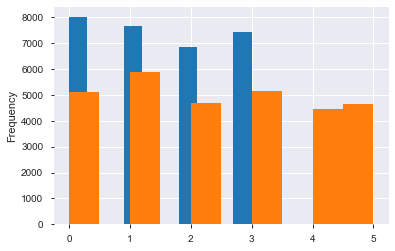

In [25]:
# Showing combined histogram of both 4 and 6 equal-sized bins for age
# 4 bins: 20-27, 28-33, 34-40, 41-79
# 6 bins: 20-25, 26-29, 30-33, 34-38, 39-44, 45-79
credit['age_4'].plot(kind='hist') 
credit['age_6'].plot(kind='hist') 

In [26]:
# Viewing sample of two new variables
credit.sample(5)

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
17064      70000    2          1         2   24      1      2      0      0   
7721      360000    2          1         1   33      1      0      0      0   
12833     290000    2          2         2   29      0      0      0      0   
253       160000    2          1         2   28      0      0      0      0   
26547     520000    2          3         1   54      0      0      0      0   

       PAY_5  ...  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  \
17064      0  ...      16257       500      1300      1240       600   
7721       0  ...          0         0         0         0         0   
12833      0  ...     208000     12324     10508      8530      8777   
253        0  ...      84426      7042      2000      1000     99669   
26547      0  ...     294641     28500     30500     30000     15000   

       PAY_AMT5  PAY_AMT6  default  age_4  age_6  
17064      1000       608        0      0      0  
7721          0         0        1      1      2  
12833      7421      8002        0      1      1  
253       12600     10000        0      0      1  
26547     15000         0        0      3      5  

[5 rows x 26 columns]

### Preprocessing is now complete and data is good to go for EDA!

### Exploratory Data Analysis (EDA)

In [27]:
# Using pandas_profiling to provide initial exploratory data analysis to become familiar with the data
profile = ProfileReport(credit, title='PandasProfilingReport', html={'style':{'full_width':True}}) ;

In [28]:
# Report available in my GitHub. To view, click here: 
profile.to_file(output_file='eda.html')

In [29]:
credit.describe()

LIMIT_BAL           SEX     EDUCATION      MARRIAGE           AGE  \
count    29965.000000  29965.000000  29965.000000  29965.000000  29965.000000   
mean    167442.005006      1.603738      1.780277      1.551877     35.487969   
std     129760.135222      0.489128      0.728525      0.521997      9.219459   
min      10000.000000      1.000000      0.000000      0.000000     21.000000   
25%      50000.000000      1.000000      1.000000      1.000000     28.000000   
50%     140000.000000      2.000000      2.000000      2.000000     34.000000   
75%     240000.000000      2.000000      2.000000      2.000000     41.000000   
max    1000000.000000      2.000000      3.000000      3.000000     79.000000   

              PAY_1         PAY_2         PAY_3         PAY_4         PAY_5  \
count  29965.000000  29965.000000  29965.000000  29965.000000  29965.000000   
mean       0.356416      0.320340      0.304288      0.258935      0.221625   
std        0.760752      0.802064      0.790696      0.761200      0.717768   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        8.000000      8.000000      8.000000      8.000000      8.000000   

       ...      BILL_AMT6       PAY_AMT1      PAY_AMT2       PAY_AMT3  \
count  ...   29965.000000   29965.000000  2.996500e+04   29965.000000   
mean   ...   38917.012281    5670.099316  5.927983e+03    5231.688837   
std    ...   59574.147742   16571.849467  2.305346e+04   17616.361124   
min    ... -339603.000000       0.000000  0.000000e+00       0.000000   
25%    ...    1262.000000    1000.000000  8.500000e+02     390.000000   
50%    ...   17124.000000    2102.000000  2.010000e+03    1804.000000   
75%    ...   49252.000000    5008.000000  5.000000e+03    4512.000000   
max    ...  961664.000000  873552.000000  1.684259e+06  896040.000000   

            PAY_AMT4       PAY_AMT5       PAY_AMT6       default  \
count   29965.000000   29965.000000   29965.000000  29965.000000   
mean     4831.617454    4804.897047    5221.498014      0.221258   
std     15674.464538   15286.372298   17786.976864      0.415101   
min         0.000000       0.000000       0.000000      0.000000   
25%       300.000000     261.000000     131.000000      0.000000   
50%      1500.000000    1500.000000    1500.000000      0.000000   
75%      4016.000000    4042.000000    4000.000000      0.000000   
max    621000.000000  426529.000000  528666.000000      1.000000   

              age_4         age_6  
count  29965.000000  29965.000000  
mean       1.458335      2.399666  
std        1.131007      1.700036  
min        0.000000      0.000000  
25%        0.000000      1.000000  
50%        1.000000      2.000000  
75%        2.000000      4.000000  
max        3.000000      5.000000  

[8 rows x 26 columns]

### Inferences from descriptive statistics and pandas_profiling:

1.  27 variables and 29,965 total observations
2.  No missing cells or duplicate rows
3.  22 numbers, 4 categories, 1 boolean (default)
4.  AGE ranges from 21 to 79, distribution is skewed right, with mean of 35.5 years
5.  LIMIT_BAL ranges from min of 10,000 to max of 1,000,000, is skewed right, with mean of 167,442 amount extended
6.  MARRIAGE has 4 unique values, however, value 0 (Other) has by far the fewest observations, 54 out of 29,965 total
7.  Pay_0 through Pay_6 has 77% to 90% zeros, by far the highest amount of zeros in dataset
8.  Pay_2 through Pay_6 values tend to go from '0' to '2'. Very few in 'Payment delay for 1 month'
9. Pay_Amt2 distribution is highly skewed right

#### Univariate analysis of all variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DF05433AF0>]],
      dtype=object)

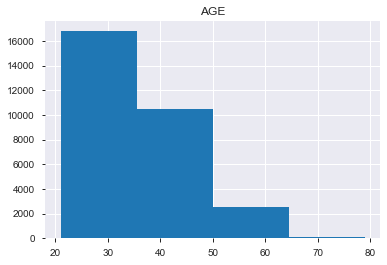

In [30]:
# AGE
# Most customers are 21-35 years
credit.hist(column=['AGE'], bins=4)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DF055FDBE0>]],
      dtype=object)

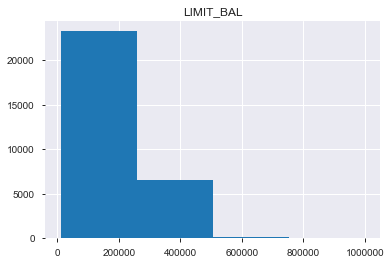

In [31]:
# Limit balance: Target variable
# Not surprisingly, most limit balances are 200,000 or less
credit.hist(column=['LIMIT_BAL'], bins=4)

In [32]:
# Descriptive stats for AGE and LIMIT_BAL
credit[['LIMIT_BAL','AGE']].describe()

LIMIT_BAL           AGE
count    29965.000000  29965.000000
mean    167442.005006     35.487969
std     129760.135222      9.219459
min      10000.000000     21.000000
25%      50000.000000     28.000000
50%     140000.000000     34.000000
75%     240000.000000     41.000000
max    1000000.000000     79.000000

**Observations:**
1. Credit limits have min of 10,000 and max of 1,000,000; it has a high std (129,760)
2. AGE ranges from 21-79 years, mean of 35.5 years

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DF05516400>]],
      dtype=object)

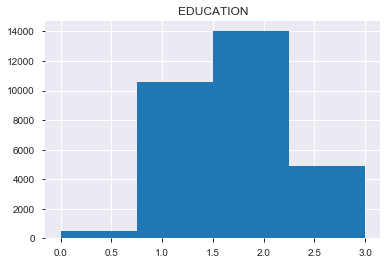

In [33]:
# EDUCATION: 0=Others, 1=Grad school, 2=University, 3=HS
# University level is highest distribution
credit.hist(column=['EDUCATION'], bins=4)

In [34]:
# Obtaining count for each education value
credit['EDUCATION'].value_counts()

2    14019
1    10563
3     4915
0      468
Name: EDUCATION, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DF05542BE0>]],
      dtype=object)

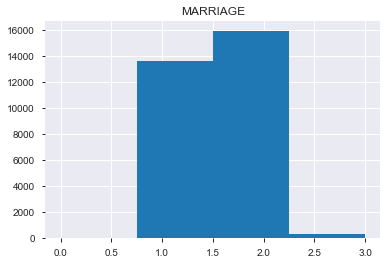

In [35]:
# MARRIAGE: 0=Others, 1=Married, 2=Single, 3=Divorced
# Most customers are either single or married, only small fraction are divorced or other
credit.hist(column=['MARRIAGE'], bins=4)

In [36]:
# Obtaining count for each marriage value
credit['MARRIAGE'].value_counts()

2    15945
1    13643
3      323
0       54
Name: MARRIAGE, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DF05627D00>]],
      dtype=object)

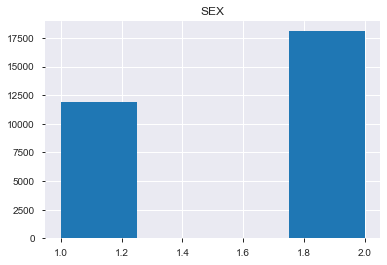

In [37]:
# SEX: 1=Male, 2=Female
# Majority customers are female
credit.hist(column=['SEX'], bins=4)

In [38]:
# Obtaining count for each Sex
credit['SEX'].value_counts()

2    18091
1    11874
Name: SEX, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DF05687BE0>]],
      dtype=object)

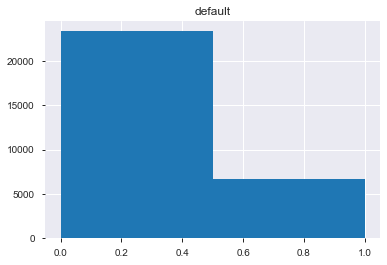

In [39]:
# Default: 0=No default, 1=Default
# Majority customers do not default
credit.hist(column=['default'], bins=2)

In [40]:
# Count by default (1) and no default (0)
# 78% of customers do not default, 22% of customers default
credit['default'].value_counts()

0    23335
1     6630
Name: default, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DF056E42E0>,
      dtype=object)

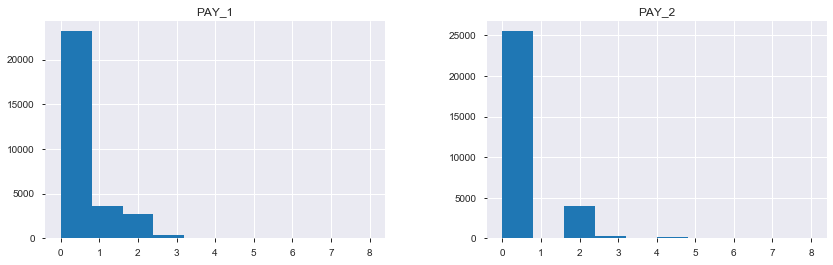

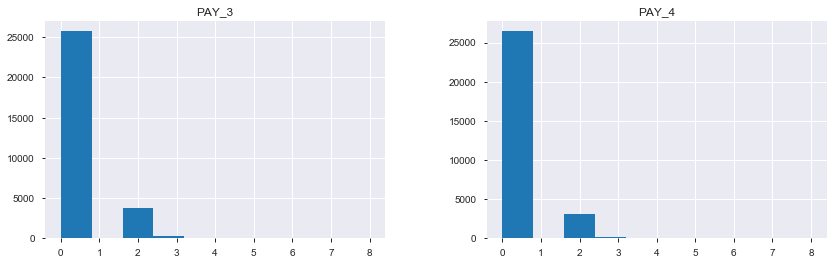

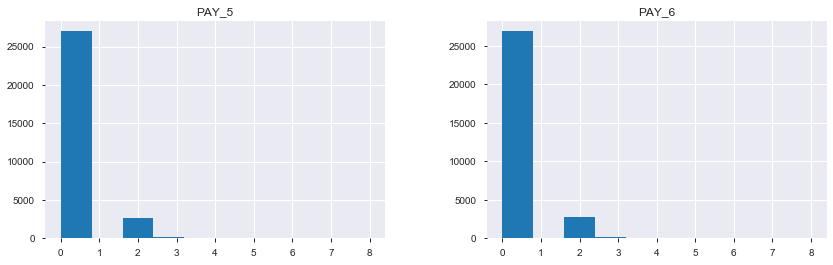

In [41]:
# Distribution of PAY_1 through PAY_6
# -2=No consumption; -1=Paid in full; 0=Revolving credit; 1=1 month pay delay; 2=2 month pay delay; etc.
# 0 is by far highest distribution
# 1 is very low in PAY_2 through PAY_6
credit.hist(column=['PAY_1','PAY_2'],figsize=(14,4))
credit.hist(column=['PAY_3','PAY_4'],figsize=(14,4))
credit.hist(column=['PAY_5','PAY_6'],figsize=(14,4))

**Observations:** 
1. For all pay features, most accounts are in good standing (value 0). For those that are not, it's more common for 'months late' to be a smaller number.
2. Noticing a gap between value 0 and value 2 starting at Pay_2. It doesn't make sense that you would go from good standing one month to 2 month delay the next month.

In [42]:
# Checking pay status from July to August
credit.loc[credit['PAY_2']==2, ['PAY_2', 'PAY_3']].head(10)

PAY_2  PAY_3
0       2      0
1       2      0
13      2      2
15      2      0
50      2      2
53      2      0
62      2      2
66      2      2
71      2      2
89      2      0

This shows that accounts with good standing in July (value=0) have progressed to 2 month delay in August (value=2). Need to check with Stakeholder to question issue.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DF059130D0>,
      dtype=object)

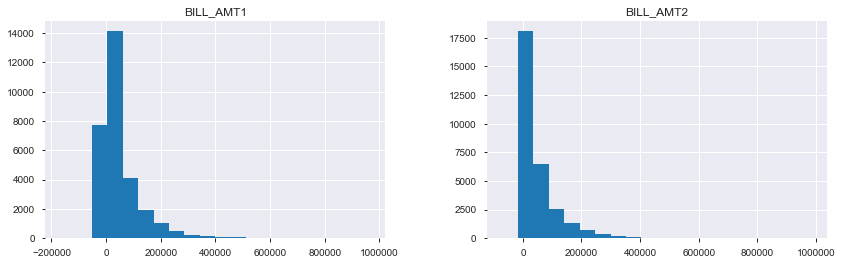

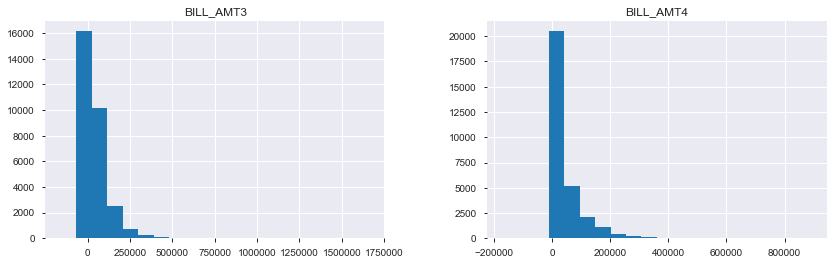

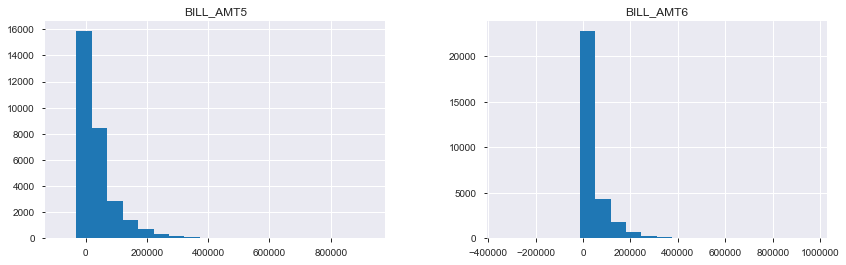

In [43]:
# Distribution of BILL_AMT variables: BILL STATEMENTS FOR PRIOR 6 MONTHS
# BILL_AMT ranges from negative to postive statements, by far greatest distribution closer to zero
credit.hist(column=['BILL_AMT1','BILL_AMT2'],figsize=(14,4), bins=20)
credit.hist(column=['BILL_AMT3','BILL_AMT4'],figsize=(14,4), bins=20)
credit.hist(column=['BILL_AMT5','BILL_AMT6'],figsize=(14,4), bins=20)

In [44]:
bill_feats = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
credit[bill_feats].describe()

BILL_AMT1      BILL_AMT2     BILL_AMT3      BILL_AMT4  \
count   29965.000000   29965.000000  2.996500e+04   29965.000000   
mean    51283.009778   49236.366294  4.706792e+04   43313.329885   
std     73658.132403   71195.567392  6.937135e+04   64353.514373   
min   -165580.000000  -69777.000000 -1.572640e+05 -170000.000000   
25%      3595.000000    3010.000000  2.711000e+03    2360.000000   
50%     22438.000000   21295.000000  2.013500e+04   19081.000000   
75%     67260.000000   64109.000000  6.020100e+04   54601.000000   
max    964511.000000  983931.000000  1.664089e+06  891586.000000   

           BILL_AMT5      BILL_AMT6  
count   29965.000000   29965.000000  
mean    40358.334390   38917.012281  
std     60817.130623   59574.147742  
min    -81334.000000 -339603.000000  
25%      1787.000000    1262.000000  
50%     18130.000000   17124.000000  
75%     50247.000000   49252.000000  
max    927171.000000  961664.000000

**Observations:**
1. Mean bill amount is between 40,000 - 52,000 per month
2. The minimums are negative, which makes sense if a customer overpaid or paid in advance
3. The maximum ranges from 900,000 to 1.67 million, also seems to make sense
4. From, histograms, steady decline in observations as bill amounts increase. No data inconsistencies

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DF06C287F0>,
      dtype=object)

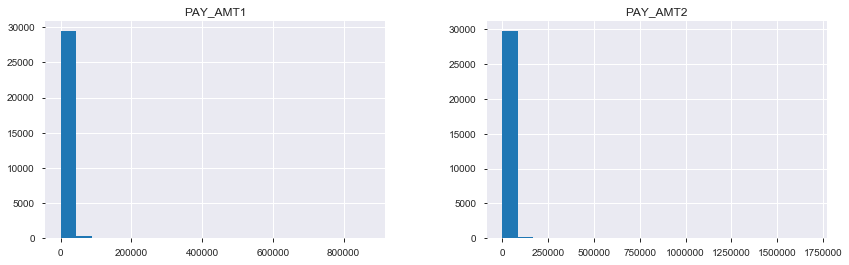

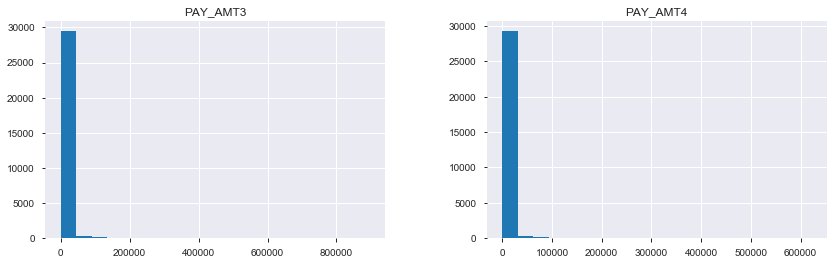

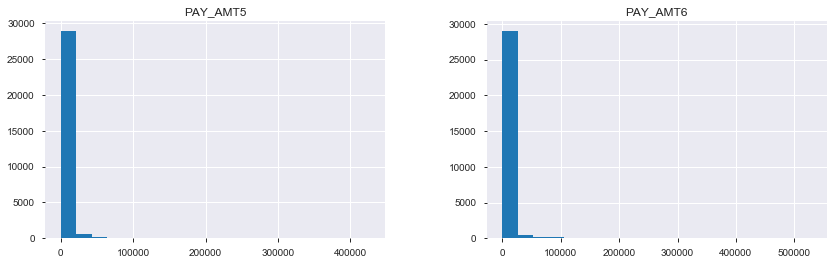

In [45]:
# Distribution of PAY_AMT variables: PAYMENTS MADE in PRIOR 6 MONTHS
# PAY_AMT ranges from negative to postive statements, by far greatest distribution closer to zero 
credit.hist(column=['PAY_AMT1','PAY_AMT2'],figsize=(14,4), bins=20)
credit.hist(column=['PAY_AMT3','PAY_AMT4'],figsize=(14,4), bins=20)
credit.hist(column=['PAY_AMT5','PAY_AMT6'],figsize=(14,4), bins=20)

**Observations:**
1. The minimum payment is zero for all months, makes sense
2. The max ranges from 400,000 to 1.68 million
3. The mean monthly payment is about 4800-6000
4. The 75% range is between 4000-5000, while the max is up to 1.68 million. Huge difference. Most payments are smaller.

In [46]:
import matplotlib.patches as mpatches

### Bivariate Analysis of Default Status (understanding customers who default on loans)

**Default status by Limit Balance**

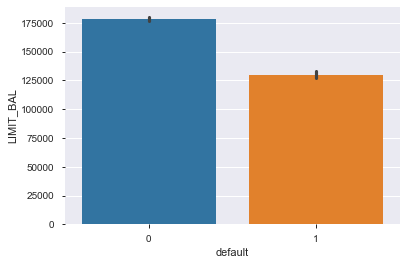

In [47]:
# Limit balance by Default (0=No default, 1=Default)
sns.barplot(x='default', y='LIMIT_BAL', data=credit)

In [48]:
# Average Limit Balance by Default
limitavg = credit.groupby(['default'])[['LIMIT_BAL']].mean()
print(round(limitavg,2))

         LIMIT_BAL
default           
0        178084.51
1        129984.57


**Default by Limit Balance:** Customers who Default receive less credit in the first place

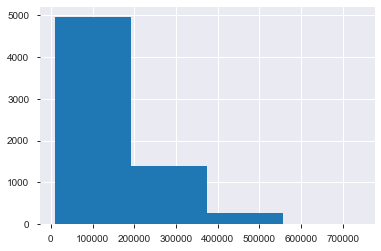

In [49]:
credit[credit.default==1].LIMIT_BAL.hist(bins=4)

**Default status by Sex**

In [50]:
# Default by Sex (1=Male, 2=Female)
pd.crosstab(credit['SEX'], credit['default'])

default      0     1
SEX                 
1         9005  2869
2        14330  3761

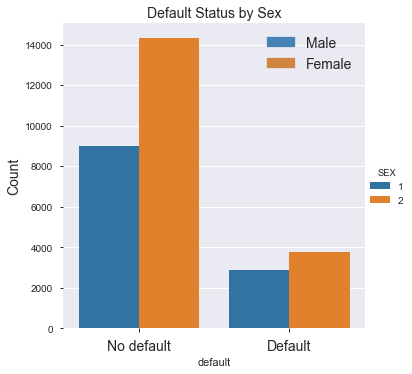

In [51]:
# Default by Sex overall Count
ax = sns.catplot('default', data=credit, hue='SEX', kind='count', aspect=1.0)
ax.set_xticklabels(['No default', 'Default'])

colors = ['steelblue','peru']
texts = ['Male','Female']
patches = [mpatches.Patch(color=colors[i], label='{:s}'.format(texts[i])) for i in range(len(texts))]

plt.ylabel('Count', fontsize=14)
plt.title('Default Status by Sex', fontsize=14)
plt.xticks(fontsize=14)
plt.legend(handles=patches, fontsize=14)

In [52]:
# Percent difference for Default by Sex
s = pd.crosstab(credit['SEX'], credit['default']).apply(lambda r: r/r.sum(), axis=1)
s

default         0         1
SEX                        
1        0.758380  0.241620
2        0.792107  0.207893

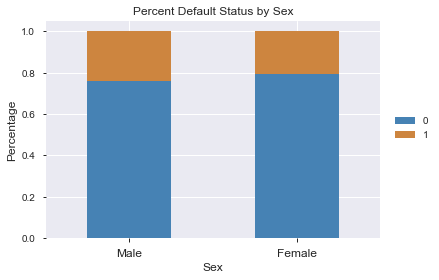

In [53]:
# Visualizing Default by Sex Percent
s.loc[:,:].plot.bar(stacked=True, color=colors, figsize=(6,4))

index = np.arange(2)
labels = ['Male','Female',]

plt.xlabel('Sex', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.title('Percent Default Status by Sex', fontsize=12)
plt.xticks(index, labels, fontsize=12, rotation=0)
plt.legend(bbox_to_anchor=(1.17, .6))

**Observation by Sex:**
On a percent basis, women are slightly less likely to default than men (20.8 vs. 24.2 respectively)

**Default status by Education**

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

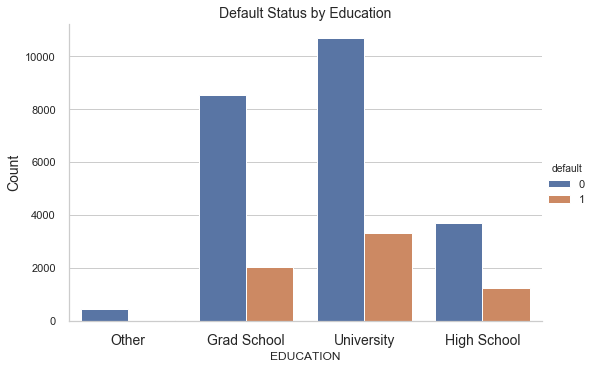

In [109]:
# Default by Education Count
ax = sns.catplot('EDUCATION', data=credit, hue='default', kind='count', aspect=1.5)
ax.set_xticklabels(['Other','Grad School','University','High School'])

plt.ylabel('Count', fontsize=14)
plt.title('Default Status by Education', fontsize=14)
plt.xticks(fontsize=14)

In [111]:
#Default count by Education level
default0 = credit.groupby(credit['EDUCATION'][credit['default']==0]).size().reset_index(name='Not Default')
default1 = credit.groupby(credit['EDUCATION'][credit['default']==1]).size().reset_index(name='Default')

total = credit.groupby('EDUCATION').size().reset_index(name='Total')

percent_default = round((default1['Default']/total['Total'])*100,2).reset_index(name='Percent_Defaulted')
percent_not_default = round((default0['Not Default']/total['Total'])*100,2).reset_index(name='Percent_Not_Defaulted')

eduTable = default0.join(default1['Default']).join(total['Total']).join(percent_default['Percent_Defaulted']).join(percent_not_default['Percent_Not_Defaulted'])
eduTable['EDUCATION'] = ['Other', 'Grad School', 'University', 'High School']
eduTable

EDUCATION  Not Default  Default  Total  Percent_Defaulted  \
0        Other          435       33    468               7.05   
1  Grad School         8531     2032  10563              19.24   
2   University        10691     3328  14019              23.74   
3  High School         3678     1237   4915              25.17   

   Percent_Not_Defaulted  
0                  92.95  
1                  80.76  
2                  76.26  
3                  74.83

In [55]:
pd.crosstab(credit['EDUCATION'], credit['default'])

default        0     1
EDUCATION             
0            435    33
1           8531  2032
2          10691  3328
3           3678  1237

In [56]:
# Percent difference for Default by Education
df = pd.crosstab(credit['EDUCATION'], credit['default']).apply(lambda r: r/r.sum(), axis=1)
df

default           0         1
EDUCATION                    
0          0.929487  0.070513
1          0.807630  0.192370
2          0.762608  0.237392
3          0.748321  0.251679

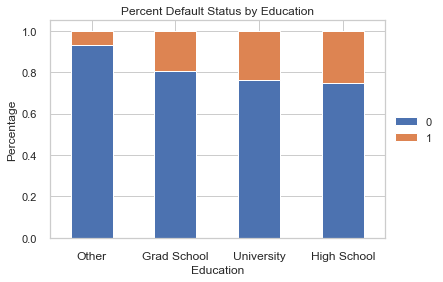

In [112]:
# Visualizing Default by Education Percent
df.loc[:,:].plot.bar(stacked=True, figsize=(6,4))

index = np.arange(4)
labels = ['Other','Grad School','University','High School']

plt.xlabel('Education', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.title('Percent Default Status by Education', fontsize=12)
plt.xticks(index, labels, fontsize=12, rotation=0)
plt.legend(bbox_to_anchor=(1.17, .6))

**Observations:**
1. On a percent basis for defaulting by Education, order from least to greatest is Other (7.1), Grad School (19.2), University (23.7), High School (25.2)
2. University and High School are very similar proportionately for defaulting.

**Default status by Marital Status**

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

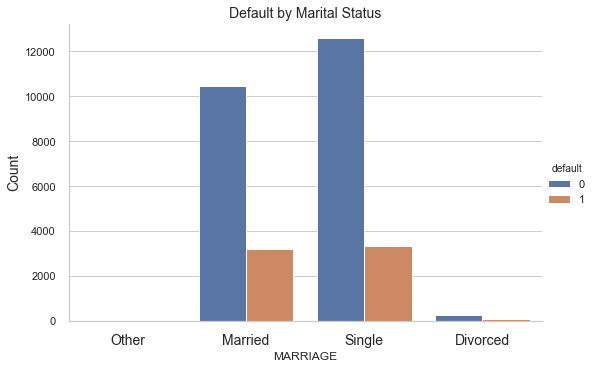

In [114]:
# Default by Marital Status Count
ax = sns.catplot('MARRIAGE', data=credit, hue='default', kind='count', aspect=1.5)
ax.set_xticklabels(['Other','Married','Single','Divorced'])

plt.ylabel('Count', fontsize=14)
plt.title('Default by Marital Status', fontsize=14)
plt.xticks(fontsize=14)

In [59]:
pd.crosstab(credit['MARRIAGE'], credit['default'])

default       0     1
MARRIAGE             
0            49     5
1         10442  3201
2         12605  3340
3           239    84

In [60]:
# Percent difference for Default by Education
dm = pd.crosstab(credit['MARRIAGE'], credit['default']).apply(lambda r: r/r.sum(), axis=1)
dm

default          0         1
MARRIAGE                    
0         0.907407  0.092593
1         0.765374  0.234626
2         0.790530  0.209470
3         0.739938  0.260062

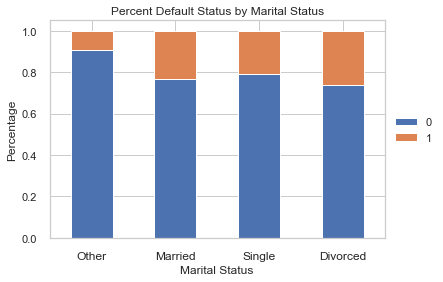

In [115]:
# Visualizing Default by Education Percent
dm.loc[:,:].plot.bar(stacked=True, figsize=(6,4))

index = np.arange(4)
labels = ['Other','Married','Single','Divorced']

plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.title('Percent Default Status by Marital Status', fontsize=12)
plt.xticks(index, labels, fontsize=12, rotation=0)
plt.legend(bbox_to_anchor=(1.17, .6))

**Observations:**
1. On a percent basis for defaulting by Marital Status, order from least to greatest is Other (9.3), Single (20.9), Married (23.5), Divorced (26.0)
2. Otherwise biggest percent difference in default is between Single (20.9) and Divorced (26.0). Married falls in between.

**Default Status by Age**

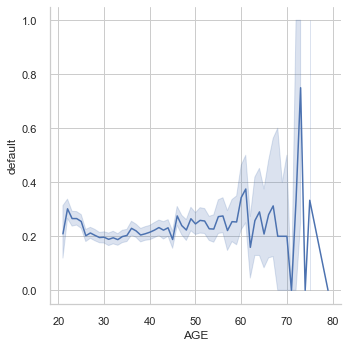

In [62]:
# Default by continuous age
# Not good visual
sns.set(style='whitegrid')
sns.relplot(x='AGE', y='default', kind='line', data=credit)

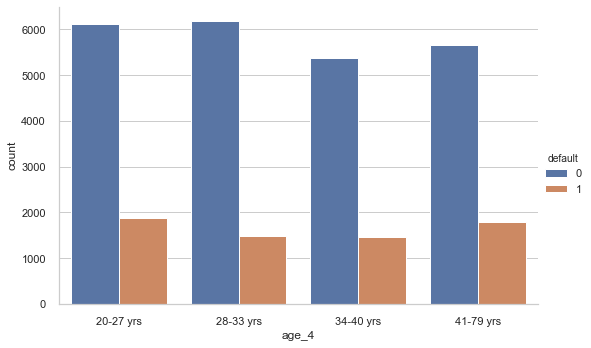

In [117]:
# Default by Age bin 4 Count
# 4 bins: 20-27, 28-33, 34-40, 41-79
ax = sns.catplot('age_4', data=credit, hue='default', kind='count', aspect=1.5)
ax.set_xticklabels(['20-27 yrs', '28-33 yrs','34-40 yrs','41-79 yrs'])

In [64]:
pd.crosstab(credit['age_4'], credit['default'])

default     0     1
age_4              
0        6118  1883
1        6186  1487
2        5376  1471
3        5655  1789

In [65]:
# Percent difference for Default by Age 4 bins
da = pd.crosstab(credit['age_4'], credit['default']).apply(lambda r: r/r.sum(), axis=1)
da

default         0         1
age_4                      
0        0.764654  0.235346
1        0.806204  0.193796
2        0.785161  0.214839
3        0.759672  0.240328

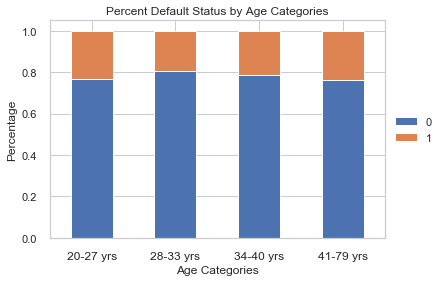

In [66]:
# Visualizing Default by 4 Age bins Percent
da.loc[:,:].plot.bar(stacked=True, figsize=(6,4))

index = np.arange(4)
labels = ['20-27 yrs','28-33 yrs','34-40 yrs','41-79 yrs']

plt.xlabel('Age Categories', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.title('Percent Default Status by Age Categories', fontsize=12)
plt.xticks(index, labels, fontsize=12, rotation=0)
plt.legend(bbox_to_anchor=(1.17, .6))

**Observations:**
1. On a percent basis for defaulting by 4 age categories, it is hard to see a noticable difference

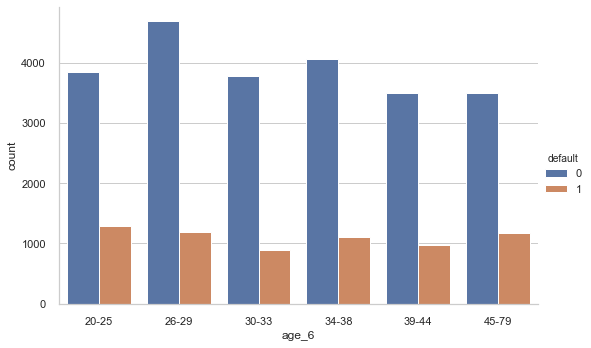

In [118]:
# Default by Age bin 6 Count
# 6 bins: 20-25, 26-29, 30-33, 34-38, 39-44, 45-79
ax = sns.catplot('age_6', data=credit, hue='default', kind='count', aspect=1.5)
ax.set_xticklabels(['20-25', '26-29','30-33','34-38','39-44','45-79'])

In [68]:
pd.crosstab(credit['age_6'], credit['default'])

default     0     1
age_6              
0        3836  1284
1        4691  1186
2        3777   900
3        4054  1101
4        3489   981
5        3488  1178

In [69]:
# Percent difference for Default by Age 6 bins
six = pd.crosstab(credit['age_6'], credit['default']).apply(lambda r: r/r.sum(), axis=1)
six

default         0         1
age_6                      
0        0.749219  0.250781
1        0.798196  0.201804
2        0.807569  0.192431
3        0.786421  0.213579
4        0.780537  0.219463
5        0.747535  0.252465

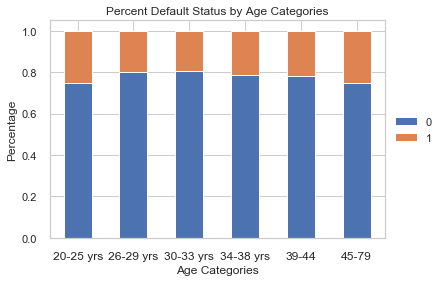

In [70]:
# Visualizing Default by 6 Age bins Percent
six.loc[:,:].plot.bar(stacked=True, figsize=(6,4))

index = np.arange(6)
labels = ['20-25 yrs','26-29 yrs','30-33 yrs','34-38 yrs','39-44','45-79']

plt.xlabel('Age Categories', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.title('Percent Default Status by Age Categories', fontsize=12)
plt.xticks(index, labels, fontsize=12, rotation=0)
plt.legend(bbox_to_anchor=(1.17, .6))

**Observations:**
1. On a percent basis for defaulting by 6 age categories, the order of default from least to greatest is 30-33 yrs (19.2), 26-29 yrs (20.2), 34-38 yrs (21.4), 39-44 yrs (21.9), 20-25 yrs (25.1), and 45-79 yrs (25.2)
2. Ages 30-33 years has the least proportion of individuals defaulting (19.2)
3. Ages 20-25 (25.1) and 45-79 (25.2) have the highest proportion of individuals defaulting
4. Overall, the **youngest and oldest customers default more often** percentage wise, while customers from **26 to 44 years default less often.**

**Default by Repayment Status (PAY features)**

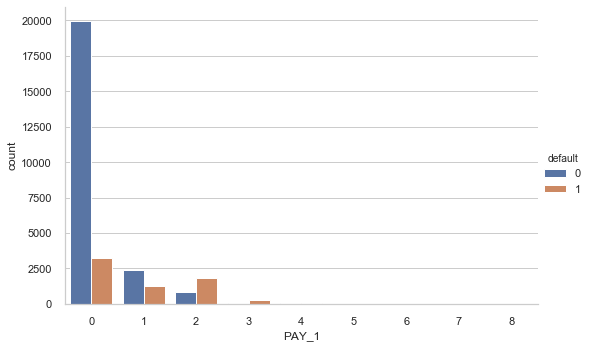

In [119]:
# Default by Repayment Status in September
# Good standing=0, Months Payment Delayed=1=8
ax = sns.catplot('PAY_1', data=credit, hue='default', kind='count', aspect=1.5)

In [72]:
pd.crosstab(credit['PAY_1'], credit['default'])

default      0     1
PAY_1               
0        19963  3206
1         2419  1248
2          823  1843
3           78   244
4           24    52
5           13    13
6            5     6
7            2     7
8            8    11

In [73]:
# Percent difference for Default by September Repayment Status
pay1 = pd.crosstab(credit['PAY_1'], credit['default']).apply(lambda r: r/r.sum(), axis=1)
pay1

default         0         1
PAY_1                      
0        0.861625  0.138375
1        0.659667  0.340333
2        0.308702  0.691298
3        0.242236  0.757764
4        0.315789  0.684211
5        0.500000  0.500000
6        0.454545  0.545455
7        0.222222  0.777778
8        0.421053  0.578947

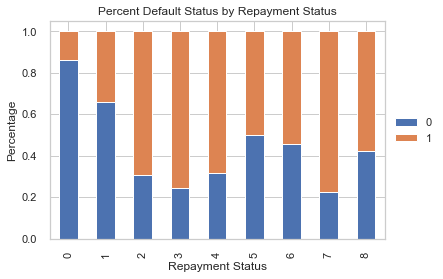

In [74]:
# Visualizing Default by 6 Age bins Percent
pay1.loc[:,:].plot.bar(stacked=True, figsize=(6,4))

plt.xlabel('Repayment Status', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.title('Percent Default Status by Repayment Status', fontsize=12)
plt.legend(bbox_to_anchor=(1.17, .6))

**Observations:**
1. September repayment status reveals that customers in good standing are much less likely to default compared to customers with 1 month delay, and especially 2 or more months delay.
2. Interesting to note that 13.8% of customers who were **in good standing still defaulted on loans**
3. Also interesting to note that customers who were **up to 8 months delayed on payments did not default on loans**

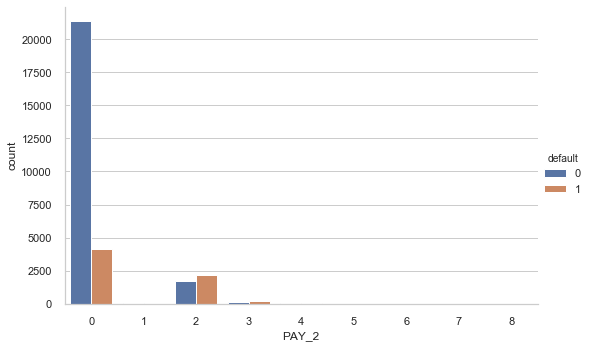

In [120]:
# Default by Repayment Status in August
# Good standing=0, Months Payment Delayed=1=8
ax = sns.catplot('PAY_2', data=credit, hue='default', kind='count', aspect=1.5)

In [76]:
pd.crosstab(credit['PAY_2'], credit['default'])

default      0     1
PAY_2               
0        21373  4155
1           23     5
2         1743  2183
3          125   201
4           49    50
5           10    15
6            3     9
7            8    12
8            1     0

In [77]:
# Percent difference for Default by August Repayment Status
pay2 = pd.crosstab(credit['PAY_2'], credit['default']).apply(lambda r: r/r.sum(), axis=1)
pay2

default         0         1
PAY_2                      
0        0.837238  0.162762
1        0.821429  0.178571
2        0.443963  0.556037
3        0.383436  0.616564
4        0.494949  0.505051
5        0.400000  0.600000
6        0.250000  0.750000
7        0.400000  0.600000
8        1.000000  0.000000

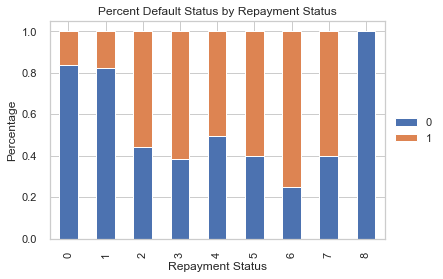

In [121]:
# Visualizing Default by August Repayment Status
pay2.loc[:,:].plot.bar(stacked=True, figsize=(6,4))

plt.xlabel('Repayment Status', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.title('Percent Default Status by Repayment Status', fontsize=12)
plt.legend(bbox_to_anchor=(1.17, .6))

**Observations:**
1. August repayment status reveals that customers in good standing and 1 month payment delay are much less likely to default compared to customers with 2 or more months delay.
2. Interesting to note that 16-17% of customers who were **in good standing or 1 month delay still defaulted on loans**
3. Also interesting to note that customers who were **up to 2-7 months delayed on payments did not default on loans**

**Default by Bill Amount: Sept, Aug, Jul, Jun, May, Apr**

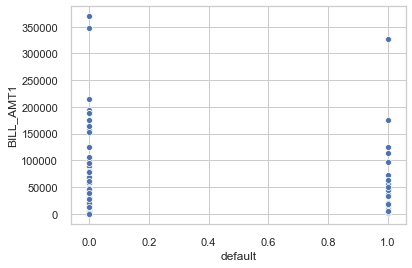

In [79]:
# Scatterplot of September bill amount by Default Status
sns.set(style='whitegrid')
data_sample = credit.sample(100)
x = data_sample['default']
y = data_sample['BILL_AMT1']

sns.scatterplot(x, y, data=credit)

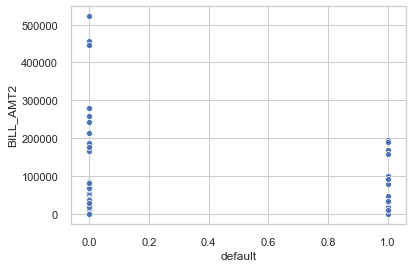

In [80]:
# Scatterplot of August Bill Amount by Default Status
sns.set(style='whitegrid')
data_sample = credit.sample(100)
x = data_sample['default']
y = data_sample['BILL_AMT2']

sns.scatterplot(x, y, data=credit)

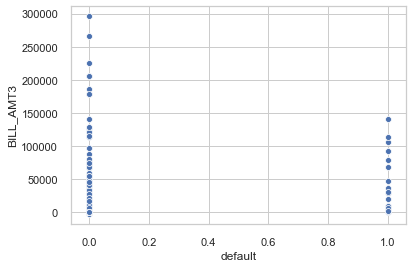

In [81]:
# Scatterplot of July Bill Amount by Default Status
sns.set(style='whitegrid')
data_sample = credit.sample(100)
x = data_sample['default']
y = data_sample['BILL_AMT3']

sns.scatterplot(x, y, data=credit)

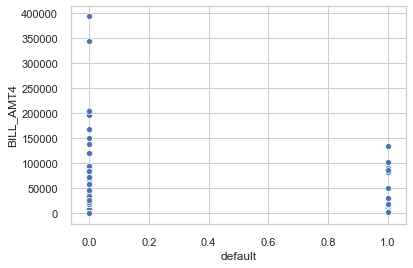

In [82]:
# Scatterplot of June Bill Amount by Default Status
sns.set(style='whitegrid')
data_sample = credit.sample(100)
x = data_sample['default']
y = data_sample['BILL_AMT4']

sns.scatterplot(x, y, data=credit)

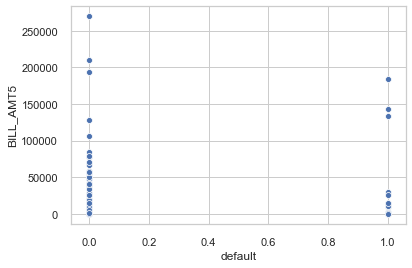

In [83]:
# Scatterplot of May Bill Amount by Default Status
sns.set(style='whitegrid')
data_sample = credit.sample(100)
x = data_sample['default']
y = data_sample['BILL_AMT5']

sns.scatterplot(x, y, data=credit)

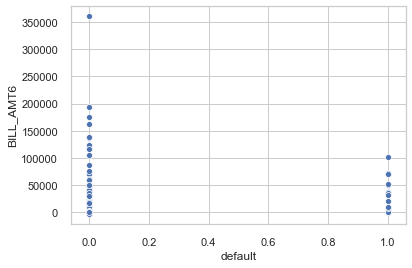

In [84]:
# Scatterplot of April Bill Amount by Default Status
sns.set(style='whitegrid')
data_sample = credit.sample(100)
x = data_sample['default']
y = data_sample['BILL_AMT6']

sns.scatterplot(x, y, data=credit)

In [85]:
credit[credit['BILL_AMT1']==0].groupby(['default'])['default'].count()

default
0    1449
1     529
Name: default, dtype: int64

In [86]:
credit[credit['BILL_AMT2']==0].groupby(['default'])['default'].count()

default
0    1864
1     612
Name: default, dtype: int64

In [87]:
credit[credit['BILL_AMT3']==0].groupby(['default'])['default'].count()

default
0    2155
1     685
Name: default, dtype: int64

In [88]:
credit[credit['BILL_AMT4']==0].groupby(['default'])['default'].count()

default
0    2389
1     776
Name: default, dtype: int64

In [89]:
# Average Bill Amount for prior 6 months by Default Status
billavg = credit.groupby(['default'])[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].mean()
print(round(billavg,2))

         BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6
default                                                                  
0         52058.72   49779.10   47592.31   43665.24   40580.69   39090.67
1         48552.81   47326.16   45222.24   42074.74   39575.72   38305.82


**Observation:**
1. In September, customers who did not default on loans had a higher bill amount on average, by about $3500
2. Prior to September, the difference in bill amounts by default incrementally becomes less: 2300, 2250, 1600, 1000, 700
3. Customers with zero value bill amounts for all historical months are also defaulting on loans = doesn't make sense!

**Default by Payment Amount: Sept, Aug, Jul, Jun, May, Apr**

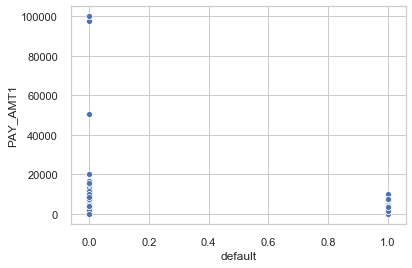

In [90]:
# Scatterplot of September Payment Amount by Default Status
sns.set(style='whitegrid')
data_sample = credit.sample(100)
x = data_sample['default']
y = data_sample['PAY_AMT1']

sns.scatterplot(x, y, data=credit)

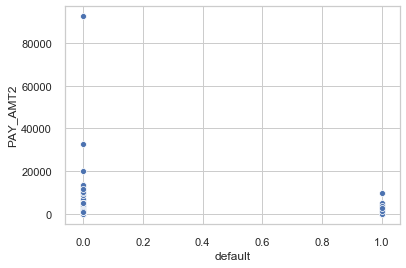

In [91]:
# Scatterplot of August Payment Amount by Default Status
sns.set(style='whitegrid')
data_sample = credit.sample(100)
x = data_sample['default']
y = data_sample['PAY_AMT2']

sns.scatterplot(x, y, data=credit)

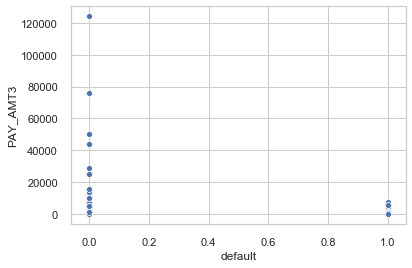

In [92]:
# Scatterplot of July Payment Amount by Default Status
sns.set(style='whitegrid')
data_sample = credit.sample(100)
x = data_sample['default']
y = data_sample['PAY_AMT3']

sns.scatterplot(x, y, data=credit)

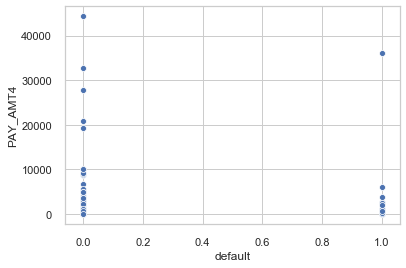

In [93]:
# Scatterplot of June Payment Amount by Default Status
sns.set(style='whitegrid')
data_sample = credit.sample(100)
x = data_sample['default']
y = data_sample['PAY_AMT4']

sns.scatterplot(x, y, data=credit)

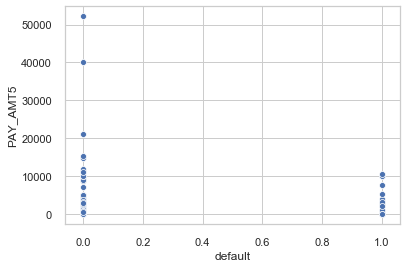

In [94]:
# Scatterplot of May Payment Amount by Default Status
sns.set(style='whitegrid')
data_sample = credit.sample(100)
x = data_sample['default']
y = data_sample['PAY_AMT5']

sns.scatterplot(x, y, data=credit)

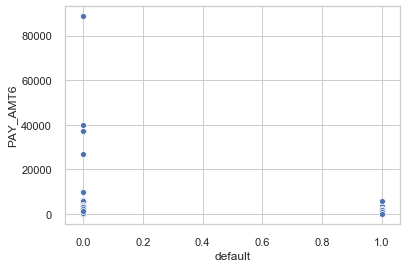

In [95]:
# Scatterplot of April Payment Amount by Default Status
sns.set(style='whitegrid')
data_sample = credit.sample(100)
x = data_sample['default']
y = data_sample['PAY_AMT6']

sns.scatterplot(x, y, data=credit)

In [96]:
# Average Payment Amount for prior 6 months by Default Status
paymentavg = credit.groupby(['default'])[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].mean()
print(round(paymentavg,2))

         PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6
default                                                            
0         6315.05   6648.59   5760.52   5306.99   5254.62   5726.36
1         3400.12   3391.72   3370.40   3158.48   3222.05   3444.60


**Observations by Payment Amount:**
1. Average payment amount for all historical months is consistently greater for customers who do not default on loans
2. Customers who **do not default on loans** make payments that are on average **2000 to 3600 more** than customers who default on loans

### Summary of differences in customer features by Default versus Do Not Default

1. Customers who Default received a credit limit that was **on average lower** than those who do not default (130,000 vs. 178,000, respectively).
2. A greater proportion of **men default than women** (24.2% vs. 20.8%, respectively)
3. A greater proportion of **High School Educated default (25.2%)** than all other categories, University (23.7%), Graduate School (19.2%), and Other (7.1%)
4. A greater proportion of customers who are **Divorced default (26.0%)**, followed by Married (23.5%), Single (20.9%), and Other (9.3%)
5. The **youngest (20-25 yrs) and oldest (45-79 yrs)** have the highest proportion defaulting, at 25.1% and 25.2%. Ages 30-33 yrs have least proportion of default (19.2%)

**By Repayment Status**
1. In Sept, customers with 2-8 month payment delay had much higher proportion of default rate (50-78%) compared to customers with 1 month delay (34%) and customers in good standing (13.8%).
2. 13.8% of customers in good standing in September defaulted.
3. 22-50% of customers with 2-8 month payment delays did not default.

**By Bill History Amount:** Customers who defaulted had **$700-3500 average lower bill** than customers who did not default.

**By Payment History:** Customers who default consistently **make lower payments on average** by $2000-3600.

### Multivariate Analysis by Default and No Default

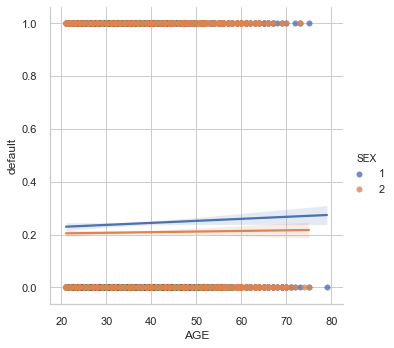

In [97]:
# Default rates by Age and Sex
sns.lmplot('AGE','default',data=credit, hue='SEX')

Men overall are slightly more likely to default, and spread increases as they get older

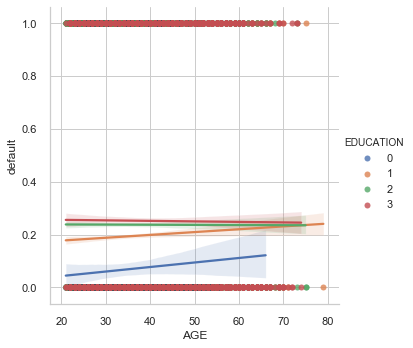

In [98]:
# Default by Age and Education
sns.lmplot('AGE','default',data=credit, hue='EDUCATION')

Default rates for Grad School and Other Education  are lower overall, but increase with age.

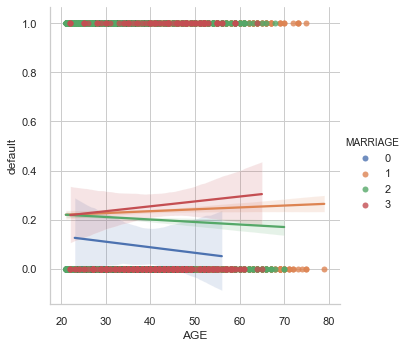

In [99]:
# Default by Age and Marriage
sns.lmplot('AGE','default',data=credit, hue='MARRIAGE')

Default rates by Single and Other status decline with age, while defaults with Married and Divorced customers increases with age.

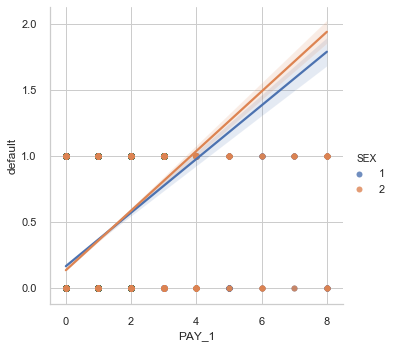

In [100]:
# Default by Sex and Repayment Status
sns.lmplot('PAY_1','default',data=credit, hue='SEX')

September repayment status has high positive linear relationship with default status. Again, men are ever so slightly more likely to default as payment delays acrue.

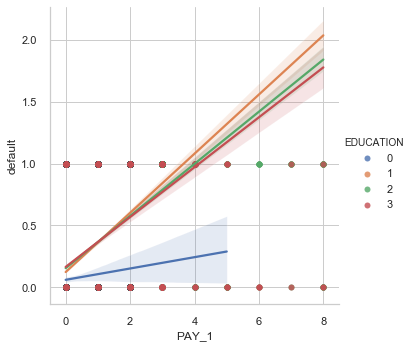

In [101]:
# Default by Education and Repayment Status
sns.lmplot('PAY_1','default',data=credit, hue='EDUCATION')

September repayment has high positive linear relationship with default status for all Education levels except 'Other.' Other still has positive relationship, but much less so.

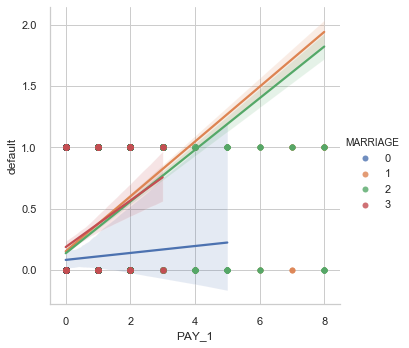

In [102]:
# Default by Marital Status and Repayment Status
sns.lmplot('PAY_1','default',data=credit, hue='MARRIAGE')

September repayment has high positive linear relationship with default status for all Marital statuses except 'Other.'

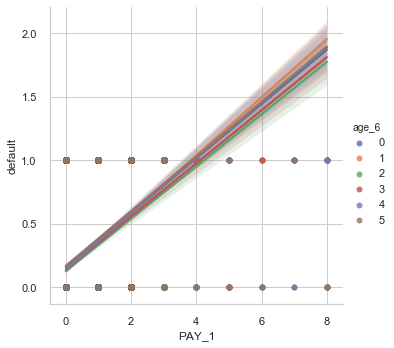

In [103]:
# Default by Age and Repayment Status
sns.lmplot('PAY_1','default',data=credit, hue='age_6')

September repayment has high positive linear relationship with default status for all age groups.

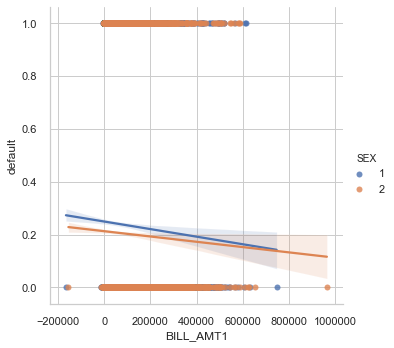

In [104]:
# Default by Sex and Bill Amount
sns.lmplot('BILL_AMT1','default',data=credit, hue='SEX')

Interesting that as bill amount goes up, defaults decline for both sexes. Negative linear relationship between bill amount and defaulting, which matches earlier bill amount observations.

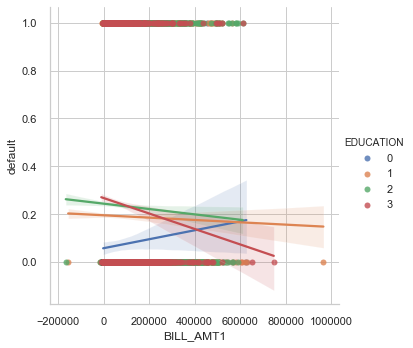

In [105]:
# Default by Education and Bill Amount
sns.lmplot('BILL_AMT1','default',data=credit, hue='EDUCATION')

1. **Other Education:** Positive relationship between Bill Amount and rates of defaults. As bill gets higher, default rates increase
2. **Grad School & University:** Slight negative relationship between Bill Amount and rates of defaults. As bill gets higher, default rates decline 
3. **High School:** Negative relationship between Bill Amount and rates of defaults. **As bill gets higher, default rates decline more prominently**

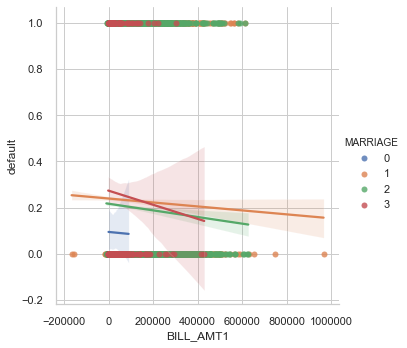

In [106]:
# Default by Marital Status and Bill Amount
sns.lmplot('BILL_AMT1','default',data=credit, hue='MARRIAGE')

For all marital statuses, default rates decline as bill amount increases

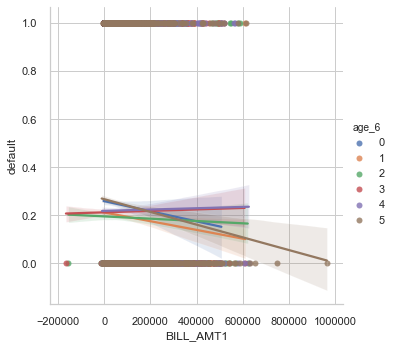

In [122]:
# Default by Bill Amount and Age
sns.lmplot('BILL_AMT1','default',data=credit, hue='age_6')

1. Default rates decline as bill amount increases for age groups 20-25 yrs, 26-29 yrs, and 45-79 yrs

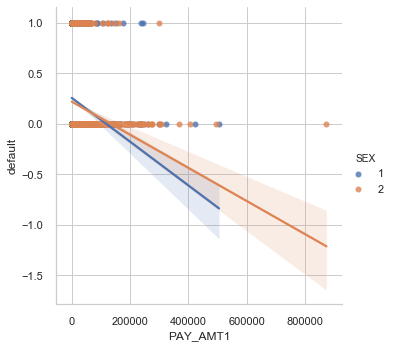

In [123]:
# Default by Sex and Payment Amount
sns.lmplot('PAY_AMT1','default',data=credit, hue='SEX')

Default rates decline as pay amounts increase. Slightly more prominent in women. Strong inverse relationship.

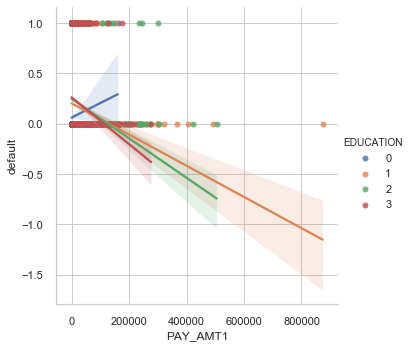

In [124]:
# Default by Education and Payment Amount
sns.lmplot('PAY_AMT1','default',data=credit, hue='EDUCATION')

1. Default rates decline as pay amounts increase for all Education levels except Other.
2. For Other, default rates increase as pay amounts increase. Doesn't make sense. Other Education also was shown to have lowest rate of default. 

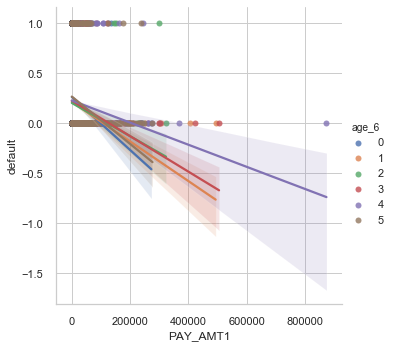

In [125]:
# Default by Age and Payment Amount
sns.lmplot('PAY_AMT1','default',data=credit, hue='age_6')

1. Default rates have strong inverse relationship with payment amounts for all age categories, but less prominently so in 39-44 yr group.

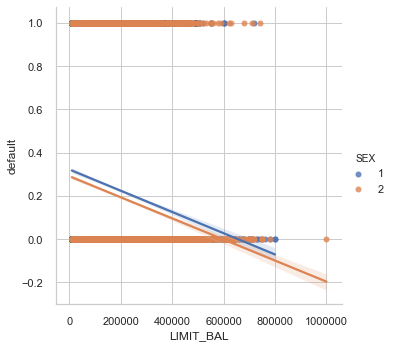

In [126]:
# Default by Sex and Limit Balance
sns.lmplot('LIMIT_BAL','default',data=credit, hue='SEX')

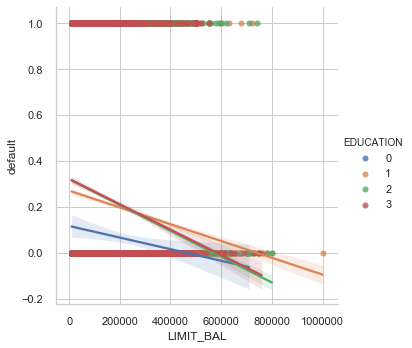

In [127]:
# Default by Education and Limit Balance
sns.lmplot('LIMIT_BAL','default',data=credit, hue='EDUCATION')

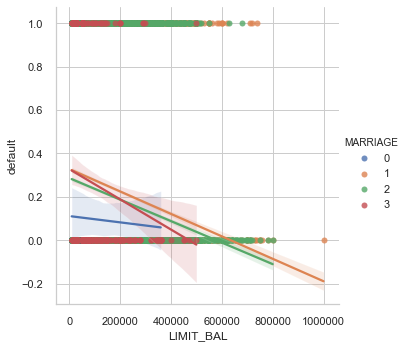

In [128]:
# Default by Marital Status and Limit Balance
sns.lmplot('LIMIT_BAL','default',data=credit, hue='MARRIAGE')

### Summary of Multivariate Analysis of Default

**Education** 
1. Greater proportion of high school education default (25.2%) than all other categories
2. **Except when bill gets higher, default rates decline more prominently for HS than other Ed levels (negative relationship)**
3. Other Education has lowest proportion of default (7.1%)
4. **Except when bill gets higher, defaults start increasing (positive relationship with default and bill amount)**

**Marital Status**
1. Divorced have greatest proportion of default (26%) than all other statuses
2. **Default rates for Married and Divorced increases with age**
3. **Default rates for Single and Other (but less so) decline with age**

**Age**
1. The youngest (20-25 yrs) and oldest (45-79 yrs) have highest rates of default, 25.1 and 25.2%.
2. Age 30-33 yrs has least at 19.2%
3. **Default rates decline as bill amounts increase only for 20-25 yrs, 26-29 yrs, and 45-79 yrs**

**Repay Status**
1. Strong positive linear relationship with default
2. 13.8% of customers in good standing Sept noted as defaulted
3. 22-50% of customers 2-8 months delayed in Sept noted as not defaulted

**Bill Amounts**
1. Customers who default have on average $3500 lower bill than those who do not
2. Customers with zero value bill amounts for all historical months are noted as defaulted – doesn’t make sense.
3. **Other Education default rates increase as bill amount gets higher**
4. Grad and University default rates slightly decline as bill gets higher
5. **HS Educated default rates more prominently decrease as bill gets higher**
6. **Defaults decline as bill amounts increase for 20-29 yrs and 45-79 years**

**Payment Amounts**
1. Customers who default consistently make lower payments by 2000-3600 on average
2. Default rates have strong inverse relationship with payment amounts for all age categories

### Bivariate analysis of Credit Limit (Target Variable) with all features

**Visualizing LIMIT_BAL by all features**

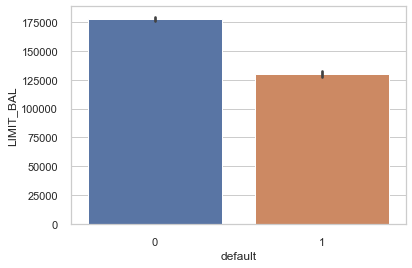

In [129]:
# Limit balance by Default (0=No default, 1=Default)
sns.barplot(x='default', y='LIMIT_BAL', data=credit)

In [130]:
# Average Limit Balance by Default and No Default
credit.groupby(['default'])['LIMIT_BAL'].mean()

default
0    178084.508249
1    129984.567119
Name: LIMIT_BAL, dtype: float64

**Shows average amount extended is higher on average for customers who do not default**

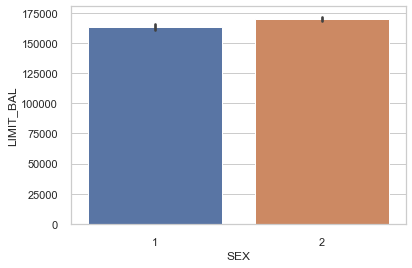

In [131]:
# Limit balance by Sex
# Generally equal
sns.barplot(x='SEX', y='LIMIT_BAL', data=credit)

In [132]:
# Average amount spent per transaction by sex
credit.groupby(['SEX'])['LIMIT_BAL'].mean()

SEX
1    163435.546572
2    170071.637831
Name: LIMIT_BAL, dtype: float64

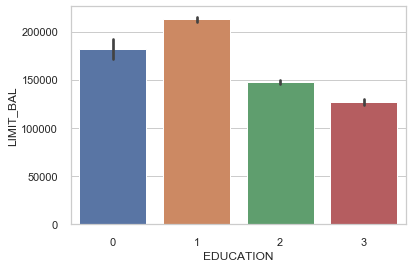

In [133]:
# Limit balance by Education (0=Other, 1=Grad school, 2=University, 3=HS)
# The more educated, the higher the credit extended, on average
sns.barplot(x='EDUCATION', y='LIMIT_BAL', data=credit)

In [134]:
# Average amount spent per transaction by EDUCATION
credit.groupby(['EDUCATION'])['LIMIT_BAL'].mean()

EDUCATION
0    181316.239316
1    212903.531194
2    147060.132677
3    126552.935910
Name: LIMIT_BAL, dtype: float64

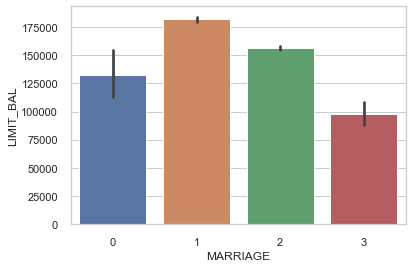

In [135]:
# Limit balance by Marriage (0=Other, 1=Married, 2=Single, 3=Divorced)
# Credit extended is highest for married individuals, followed by single, other, and divorced, respectively
sns.barplot(x='MARRIAGE', y='LIMIT_BAL', data=credit)

In [136]:
# Average amount spent per transaction by EDUCATION
credit.groupby(['MARRIAGE'])['LIMIT_BAL'].mean()

MARRIAGE
0    132962.962963
1    182151.432969
2    156378.029476
3     98080.495356
Name: LIMIT_BAL, dtype: float64

**Limit balance by Age (continuous and binned)**

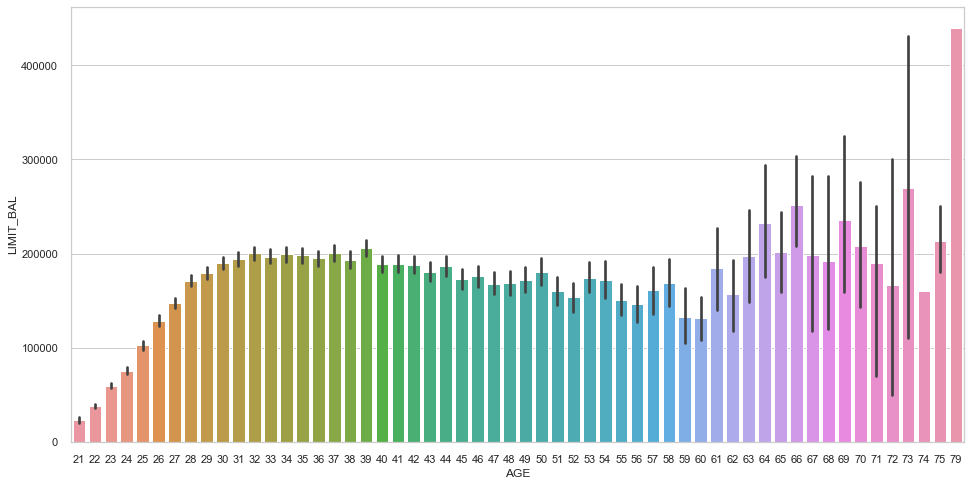

In [137]:
# Average amount extended by continuous age
plt.figure(figsize=(16, 8))
sns.barplot(x='AGE', y='LIMIT_BAL', data=credit)

**Observations with continuous Age:** Average amount extended plateaus between 31 and 40 years. After age 40, it slowly trends downward through age 60. After age 60, average limit balance has much more variance and trends slightly upward as age increases. However, with high variance, one cannot make a conclusion.

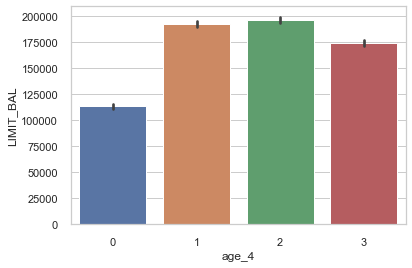

In [138]:
# Limit balance by Age_4
# 4 bins: 20-27, 28-33, 34-40, 41-79
sns.barplot(x='age_4', y='LIMIT_BAL', data=credit)

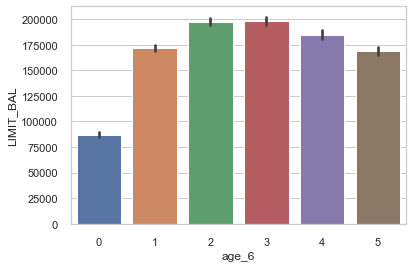

In [139]:
# Limit balance by Age_6
# 6 bins: 20-25, 26-29, 30-33, 34-38, 39-44, 45-79
sns.barplot(x='age_6', y='LIMIT_BAL', data=credit)

**Observation with categorized Age:** Limit balance tends to peak between 30-40 years on average, then overall trends downward as categorical age increase. 

**Limit balance by Repayment Status**

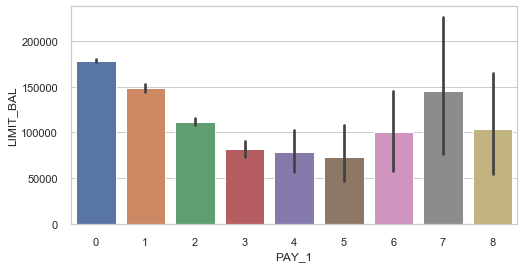

In [140]:
# Average amount extended by Repayment Status (0=good standing, 1=1 month delay, 2=2 month delay, etc.)
plt.figure(figsize=(8,4))
sns.barplot(x='PAY_1', y='LIMIT_BAL', data=credit)

**Observation:**
1. September Repayment Status by Limit Balance reveals that accounts in good standing (0) in September received higher credit limit on average overall. 
2. Average limit balance extended declines for each incremental monthly payment delay, through 4 and 5 month delay, then peaks again at 7 month delay.

**Limit Balance by Bill Amount: Sept, Aug, Jul, Jun, May, Aug**

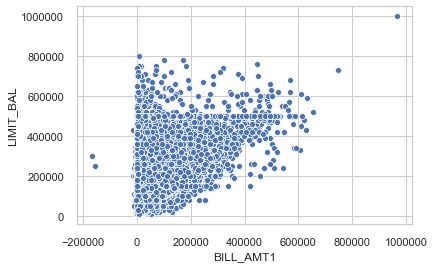

In [141]:
# September Limit balance by Bill Amount scatterplot
# Shows the overpaid as outliers
sns.scatterplot(x='BILL_AMT1',y='LIMIT_BAL', data=credit)

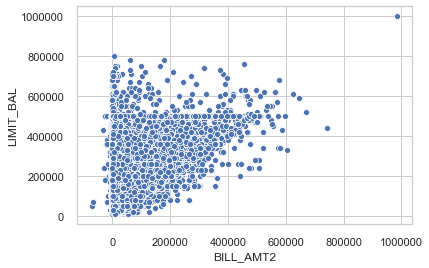

In [142]:
# August Limit balance by Bill Amount scatterplot
# Highest bill is outlier
sns.scatterplot(x='BILL_AMT2',y='LIMIT_BAL', data=credit)

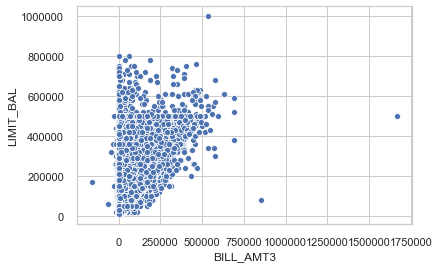

In [143]:
# July Limit balance by Bill Amount scatterplot
# Again shows outliers
sns.scatterplot(x='BILL_AMT3',y='LIMIT_BAL', data=credit)

**Observations:**
1. Positive linear relationship between Limit Balance and Bill Amount, consistent for all months.

**Limit Balance by Payment Amount: Sept, Aug, Jul, Jun, May, Apr**

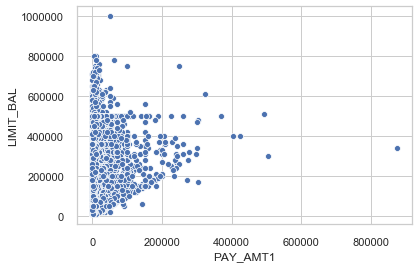

In [144]:
# September Limit balance by Payment Amount scatterplot
# Shows the overpaid as outliers
sns.scatterplot(x='PAY_AMT1',y='LIMIT_BAL', data=credit)

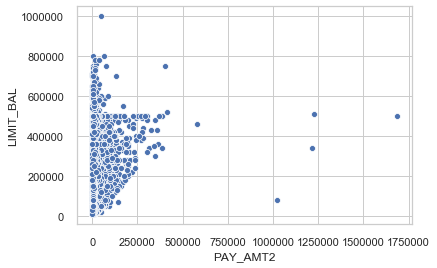

In [145]:
# August Limit balance by Payment Amount scatterplot
# Shows the overpaid as outliers
sns.scatterplot(x='PAY_AMT2',y='LIMIT_BAL', data=credit)

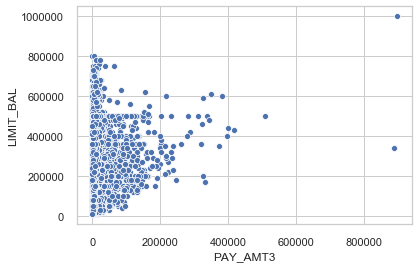

In [146]:
# July Limit balance by Payment Amount scatterplot
# Shows the overpaid as outliers
sns.scatterplot(x='PAY_AMT3',y='LIMIT_BAL', data=credit)

**Observations:** Appears to be a positive linear relationship between Limit Balance and Payment Amount, consistent for all months.

### Summary of Bivariate Analysis of Credit Limit (Target Variable)

**Average Credit Limit extended by features from highest to lowest amounts:**

**Default Status** 
1. Non-default - average 178,084
2. Default - average 129,984

**Sex** 
1. Women - average 170,071
2. Men - average 163,435

**Education**
1. Grad school (212,903)
2. Other (181,316)
3. University (147,060)
4. High School (126,552)

**Marriage**
1. Married (182,151)
2. Single (156,378)
3. Other (132,962)
4. Divorced (98,080)

**Age**
1. 28-29 years peaks
2. 30-39 years plateau
3. 40+ slowly trends down through 60
4. 60+ lots of variance, trends slightly up with age
5. Binned age = 20-25 yrs is least, trends up to 30-40 years is peak/plateau, then trends down with age

**Repayment Status**
Accounts in good standing received highest credit limit overall. Avg limit declines for each incremental monthly payment delay, through 4-5 months, then peaks again at 7 month delay.

**Bill Amount**
Strong positive linear relationship: As bill amount increases, limit balance increases.

**Payment Amount**
Strong positive linear relationship: As payment amount increases, limit balance increases.

## Multivariate Analysis of Credit Limit (Target Variable) by Default Status

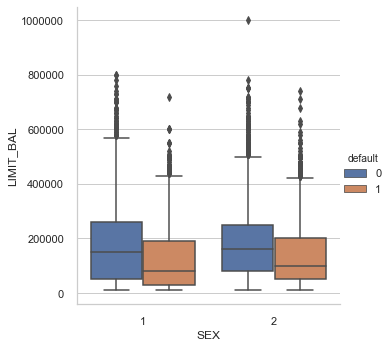

In [147]:
# Limit Balance by Default and Sex
sns.catplot(x='SEX', y='LIMIT_BAL', data=credit, kind='box', hue='default')

In [148]:
# Groupby of Default clients by age, gender, and limit balance
credit[credit['default']==1].groupby(['SEX'])['LIMIT_BAL'].mean()

SEX
1    125687.584524
2    133262.430205
Name: LIMIT_BAL, dtype: float64

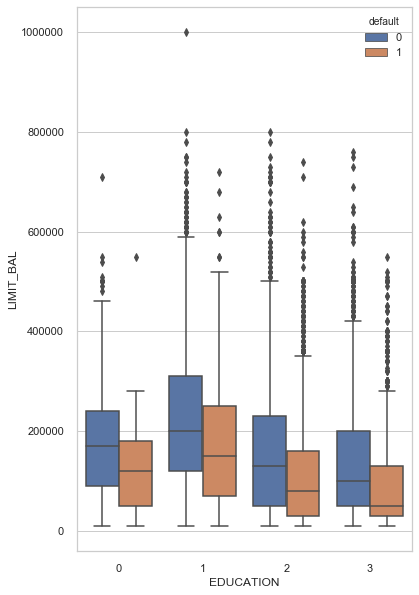

In [149]:
# Limit Balance by Default and Education
plt.figure(figsize=(6,10))
sns.boxplot(x='EDUCATION', y='LIMIT_BAL', data=credit, hue='default')

In [150]:
# Groupby of Default clients by age, gender, and limit balance
credit[credit['default']==1].groupby(['EDUCATION'])['LIMIT_BAL'].mean()

EDUCATION
0    131212.121212
1    177982.283465
2    112545.072115
3     98025.610348
Name: LIMIT_BAL, dtype: float64

**Education:** Of Default clients, Grad School educated received the most credit. HS educated received the least.

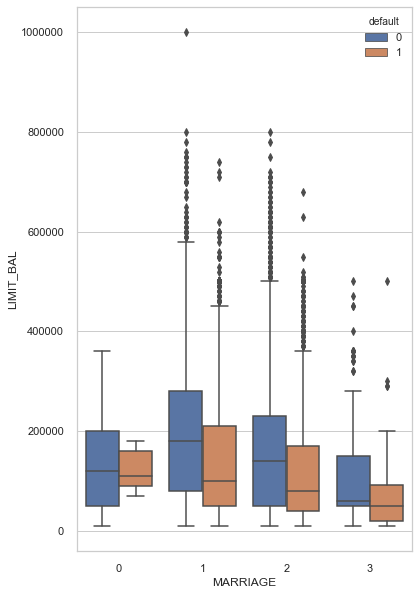

In [151]:
# Limit Balance by Default and Marriage
plt.figure(figsize=(6,10))
sns.boxplot(x='MARRIAGE', y='LIMIT_BAL', data=credit, hue='default')

In [152]:
# Groupby of Default clients by age, gender, and limit balance
credit[credit['default']==1].groupby(['MARRIAGE'])['LIMIT_BAL'].mean()

MARRIAGE
0    122000.000000
1    142933.458294
2    119014.275449
3     73214.285714
Name: LIMIT_BAL, dtype: float64

**Marriage:** Of Default clients, Married received the most credit.

<Figure size 288x576 with 0 Axes>

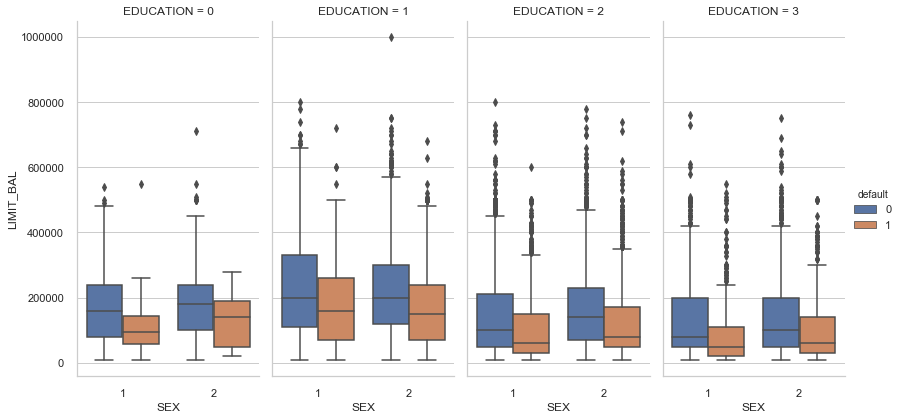

In [153]:
# Limit Balance by Default, Sex, and Education
plt.figure(figsize=(4,8))
sns.catplot(x='SEX', y='LIMIT_BAL', data=credit, kind='box', hue='default', col='EDUCATION',
           height=6, aspect=.5)

**Observations**
1. Of Default clients, Grad School received the most credit, but equal between genders.
2. Not much difference between genders.

In [154]:
# Limit Balance of Default clients by Age and Education
credit[credit['default']==1].groupby(['EDUCATION','SEX'])['LIMIT_BAL'].mean()

EDUCATION  SEX
0          1      130000.000000
           2      132105.263158
1          1      182599.557522
           2      174281.914894
2          1      102930.298720
           2      119578.563996
3          1       89885.651376
           2      104436.416185
Name: LIMIT_BAL, dtype: float64

<Figure size 288x576 with 0 Axes>

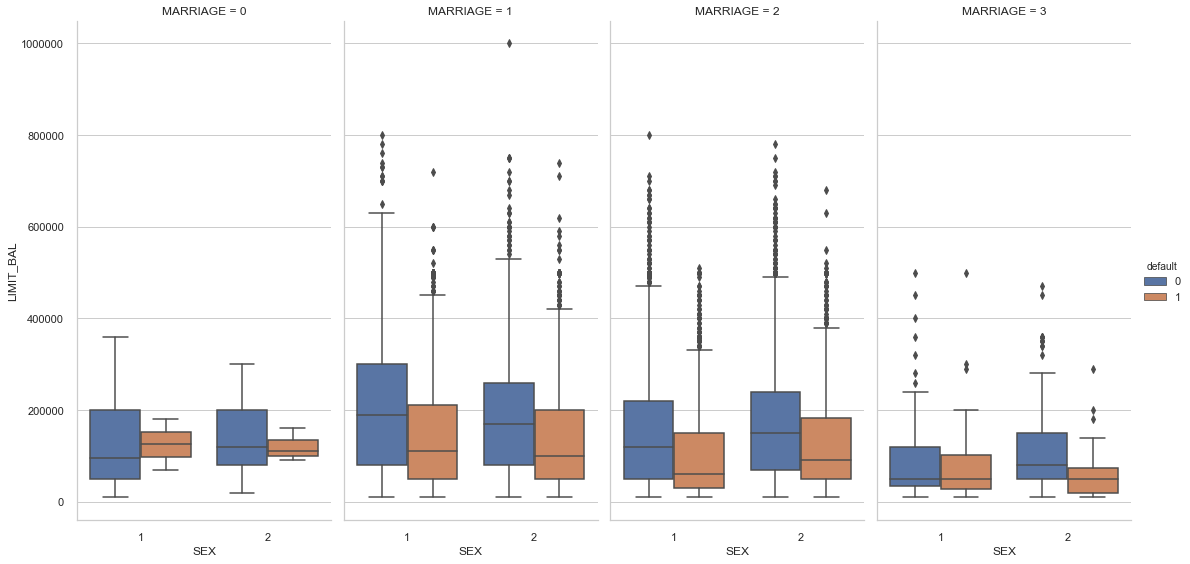

In [155]:
# Limit Balance by Default, Sex, and Marriage
plt.figure(figsize=(4,8))
sns.catplot(x='SEX', y='LIMIT_BAL', data=credit, kind='box', hue='default', col='MARRIAGE',
           height=8, aspect=.5)

**Observations:**
1. Of Default clients, Married and Other receive the most credit and pretty equal between genders. 
2. For Single clients, women who default receive more credit then men.

In [156]:
# Limit Balance of Default clients by Sex and Marriage
credit[credit['default']==1].groupby(['SEX','MARRIAGE'])['LIMIT_BAL'].mean()

SEX  MARRIAGE
1    0           125000.000000
     1           149955.323902
     2           104809.757412
     3            85500.000000
2    0           120000.000000
     1           137857.911733
     2           130371.767241
     3            62045.454545
Name: LIMIT_BAL, dtype: float64

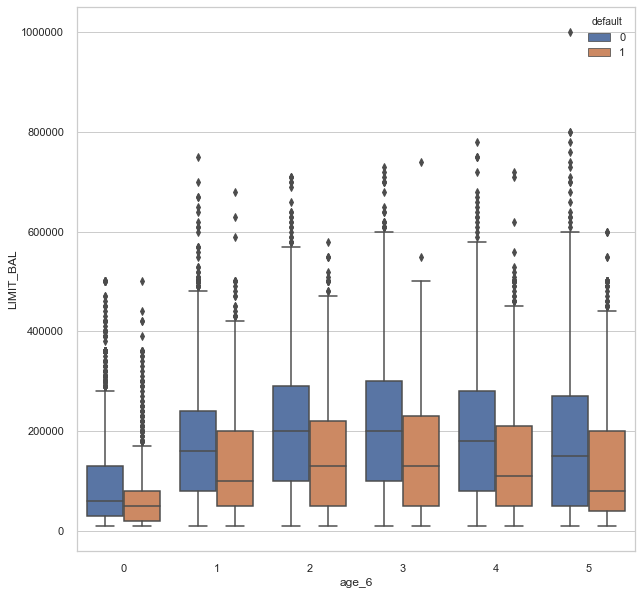

In [157]:
# Limit Balance by Default and Age
plt.figure(figsize=(10,10))
sns.boxplot(x='age_6', y='LIMIT_BAL', data=credit, hue='default')

**Age:** Of Default clients, ages 30-39 received the most credit, compared to all other ages.

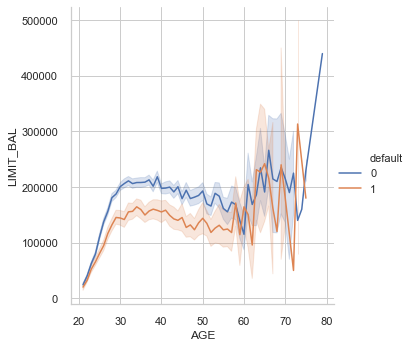

In [158]:
sns.set(style='whitegrid')

sns.relplot(x='AGE', y='LIMIT_BAL', hue='default', kind='line', data=credit)

**Age:** Of Default clients, age 30-39 received the most credit overall. After age 57, credit may start to increase again but highly variable.

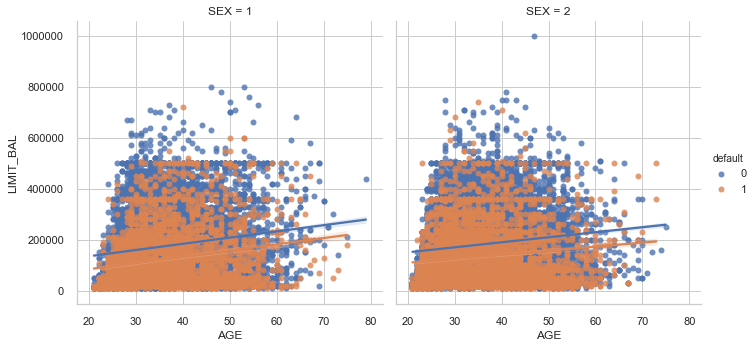

In [159]:
# Limit Balance by Age, Default, and Sex
sns.lmplot('AGE', 'LIMIT_BAL', data=credit, hue='default', col='SEX')

**Default clients:** Slight positive linear relationship with credit extended and age. No difference between genders here.

<Figure size 288x576 with 0 Axes>

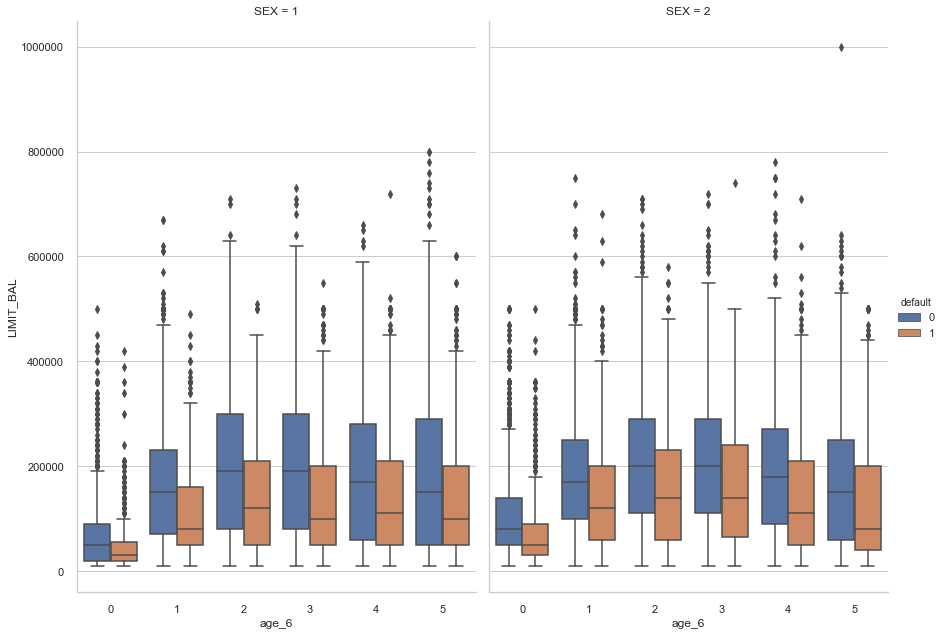

In [160]:
plt.figure(figsize=(4,8))
sns.catplot(x='age_6', y='LIMIT_BAL', data=credit, kind='box', hue='default', col='SEX',
           height=9, aspect=.7)

**Default clients:** Women who defaulted received higher credit limits then men across ages, and women 30-39 yrs received the highest credit limit on average overall.

In [161]:
# Limit Balance of Default clients by Age and Sex
credit[credit['default']==1].groupby(['age_6','SEX'])['LIMIT_BAL'].mean()

age_6  SEX
0      1       54650.112867
       2       74173.602854
1      1      111044.776119
       2      149400.278940
2      1      147550.000000
       2      159880.000000
3      1      144809.885932
       2      167304.347826
4      1      149358.947368
       2      148819.047619
5      1      140886.956522
       2      128407.960199
Name: LIMIT_BAL, dtype: float64

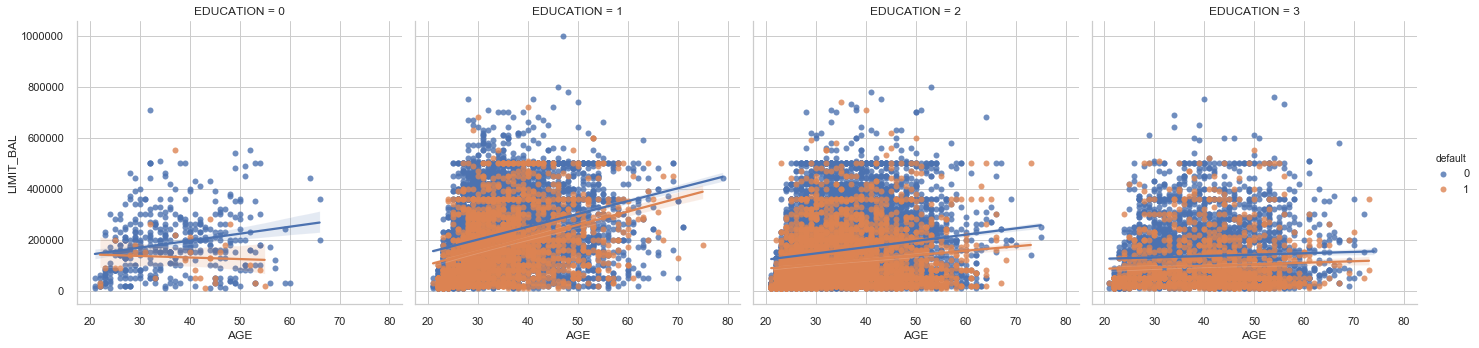

In [162]:
# Limit Balance by Age, Default, and Education
sns.lmplot('AGE', 'LIMIT_BAL', data=credit, hue='default', col='EDUCATION')

**Default clients:** 
1. Grad school credit limits increase the most as they age, more than all other Education levels.

<Figure size 288x576 with 0 Axes>

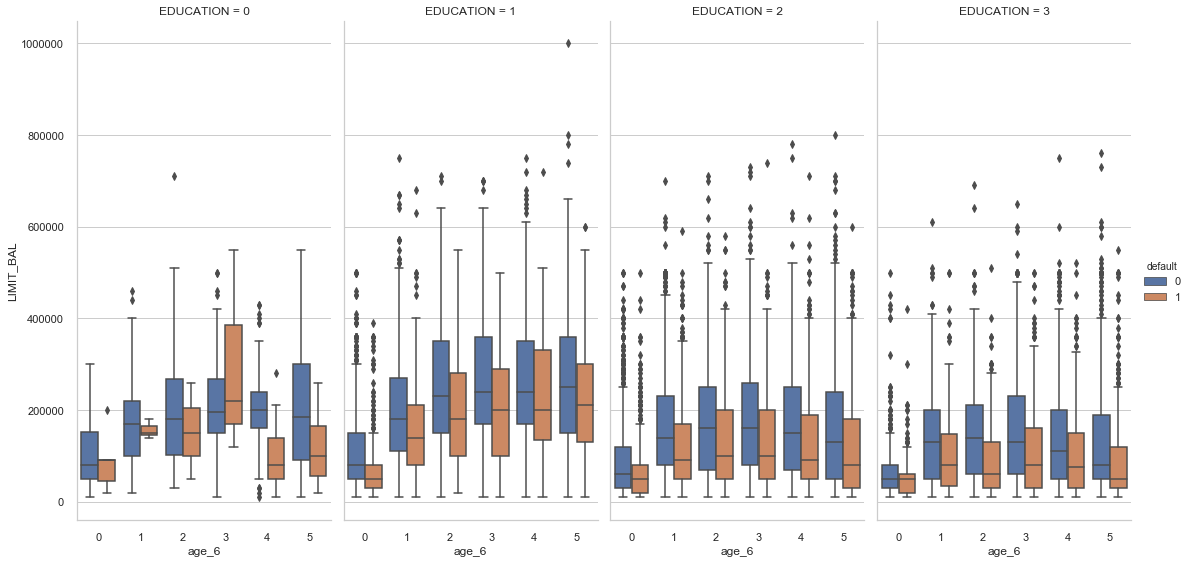

In [163]:
plt.figure(figsize=(4,8))
sns.catplot(x='age_6', y='LIMIT_BAL', data=credit, kind='box', hue='default', col='EDUCATION',
           height=8, aspect=.5)

**Default clients**
1. Grad school clients credit the highest for most ages and increases with age.
2. Other educated credit is highest at 34-39 yrs.

In [164]:
# Limit Balance of Default clients by Age and Education
credit[credit['default']==1].groupby(['age_6','EDUCATION'])['LIMIT_BAL'].mean()

age_6  EDUCATION
0      0             86666.666667
       1             72656.716418
       2             67232.142857
       3             56729.559748
1      0            156666.666667
       1            157262.931034
       2            122205.128205
       3            106492.537313
2      0            153333.333333
       1            193626.373626
       2            133598.130841
       3            103238.095238
3      0            296666.666667
       1            212216.066482
       2            131757.469244
       3            118452.380952
4      0            106363.636364
       1            232745.098039
       2            126008.676790
       3            108770.393701
5      0            117142.857143
       1            228893.280632
       2            119980.039920
       3             94964.028777
Name: LIMIT_BAL, dtype: float64

In [165]:
# Groupby of Default clients by age, gender, and limit balance
default = credit[credit['default']==1].groupby(['age_6','EDUCATION','SEX'])['LIMIT_BAL'].mean()
default

age_6  EDUCATION  SEX
0      0          1       90000.000000
                  2       86000.000000
       1          1       60625.000000
                  2       77489.539749
       2          1       54693.140794
                  2       74082.840237
       3          1       45652.173913
                  2       65222.222222
1      0          1      150000.000000
                  2      160000.000000
       1          1      137650.602410
                  2      168187.919463
       2          1      100811.965812
                  2      136467.236467
       3          1       80735.294118
                  2      133030.303030
2      0          1      150000.000000
                  2      155000.000000
       1          1      185755.813953
                  2      200677.083333
       2          1      124269.005848
                  2      139805.447471
       3          1      101250.000000
                  2      105510.204082
3      0          1      335000.000000
   

**Default clients:** The highest credit was extended average to:
1. Men Other Educated 34-39, by far (335,000)
2. Men Grad 40-79 next (239,781)
3. Women Grad 34-39 (222,972)

In [166]:
# Groupby of Default clients by age, gender, and limit balance
default = credit[credit['default']==1].groupby(['MARRIAGE','EDUCATION','SEX'])['LIMIT_BAL'].mean()
default

MARRIAGE  EDUCATION  SEX
0         2          2      160000.000000
          3          1      125000.000000
                     2      100000.000000
1         0          1      141000.000000
                     2      162857.142857
          1          1      227706.185567
                     2      210530.503979
          2          1      125015.576324
                     2      127057.673509
          3          1      103531.353135
                     2      101219.512195
2         0          1      102500.000000
                     2      114166.666667
          1          1      147865.612648
                     2      156270.053476
          2          1       85194.630872
                     2      112199.312715
          3          1       73526.986900
                     2      115515.695067
3         1          1      190000.000000
                     2      110000.000000
          2          1       52105.263158
                     2       69600.000000
         

**Default clients** Grad School educated Married Men and Women (no difference in gender) receive by far the highest credit limits than all other Education levels and Marital Statuses.

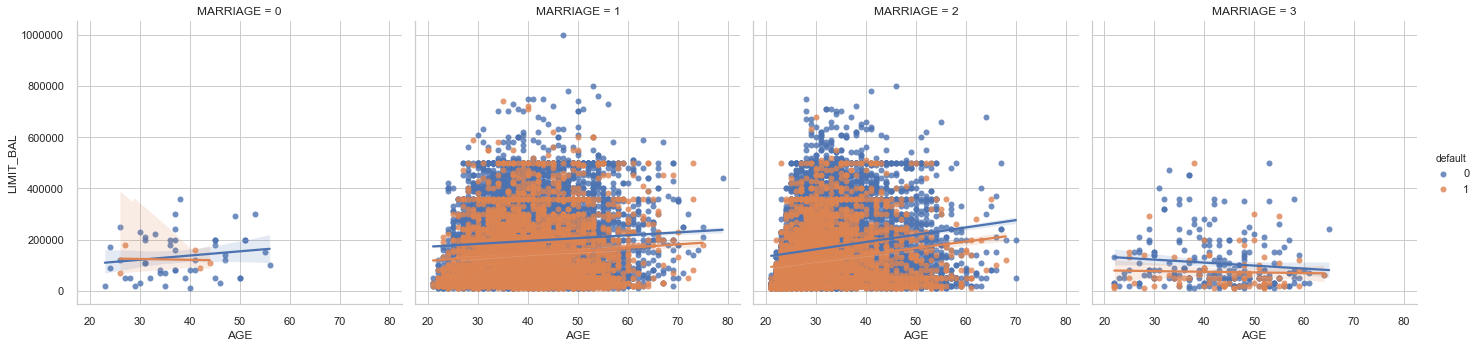

In [167]:
# Limit Balance by Age, Default, and Marriage
sns.lmplot('AGE', 'LIMIT_BAL', data=credit, hue='default', col='MARRIAGE')

**Default clients**
1. No real relationships here

<Figure size 288x576 with 0 Axes>

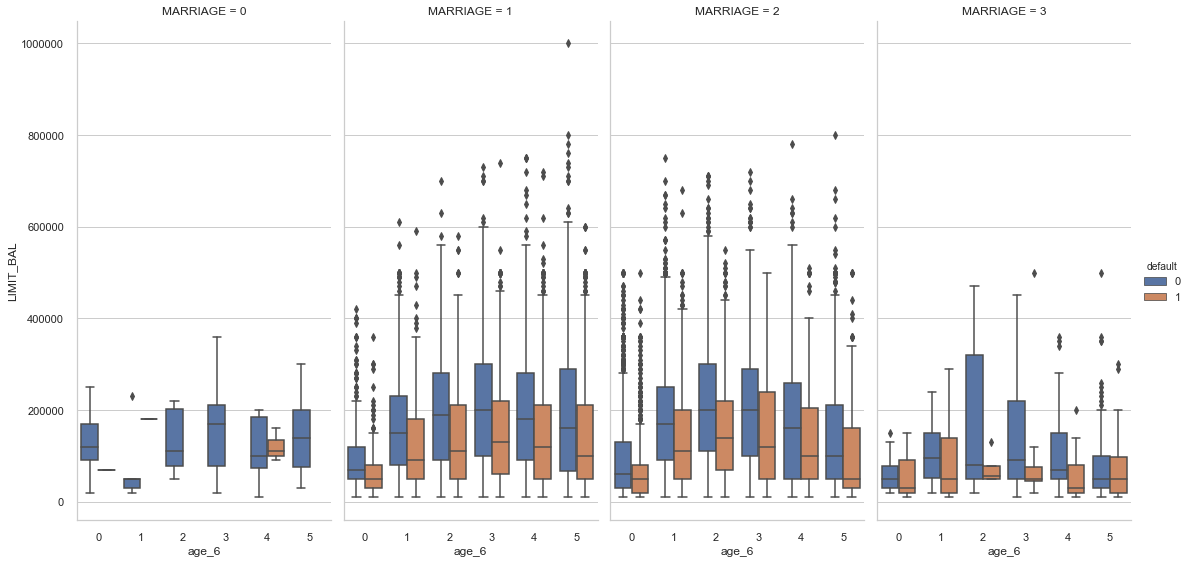

In [168]:
plt.figure(figsize=(4,8))
sns.catplot(x='age_6', y='LIMIT_BAL', data=credit, kind='box', hue='default', col='MARRIAGE',
           height=8, aspect=.5)

**Default clients**
1. Married clients who are 34-39 yrs, then 40-44 yrs receive the most credit.
2. Single clients who are 30-33 yrs receive the most credit.

In [169]:
# Groupby of Default clients by age, gender, and limit balance
credit[credit['default']==1].groupby(['age_6','MARRIAGE'])['LIMIT_BAL'].mean()

age_6  MARRIAGE
0      0            70000.000000
       1            65000.000000
       2            67887.067395
       3            58571.428571
1      0           180000.000000
       1           125903.225806
       2           137333.333333
       3           102000.000000
2      1           143425.000000
       2           163911.290323
       3            72500.000000
3      1           156935.028249
       2           156831.168831
       3           110000.000000
4      0           120000.000000
       1           154550.641940
       2           140917.683398
       3            57777.777778
5      1           143926.991150
       2           109094.827586
       3            71904.761905
Name: LIMIT_BAL, dtype: float64

No relationship.

In [170]:
# Groupby of Default clients by age, gender, and limit balance
credit[credit['default']==1].groupby(['age_6','MARRIAGE','SEX'])['LIMIT_BAL'].mean()

age_6  MARRIAGE  SEX
0      0         1       70000.000000
       1         1       53030.303030
                 2       67724.137931
       2         1       54630.541872
                 2       75664.739884
       3         1       70000.000000
                 2       50000.000000
1      0         1      180000.000000
       1         1      111494.252874
                 2      131524.663677
       2         1      111026.315789
                 2      157734.693878
       3         1       10000.000000
                 2      125000.000000
2      1         1      144647.887324
                 2      142751.937984
       2         1      149221.789883
                 2      179707.112971
       3         1      130000.000000
                 2       53333.333333
3      1         1      155819.935691
                 2      157808.564232
       2         1      128388.625592
                 2      191321.839080
       3         1      155000.000000
                 2       6500

No relationship seen

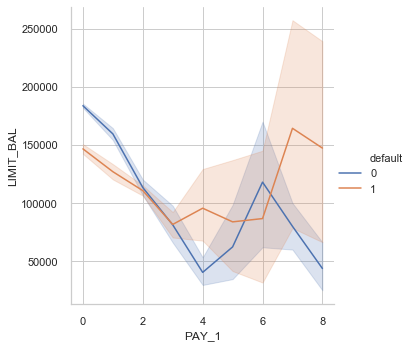

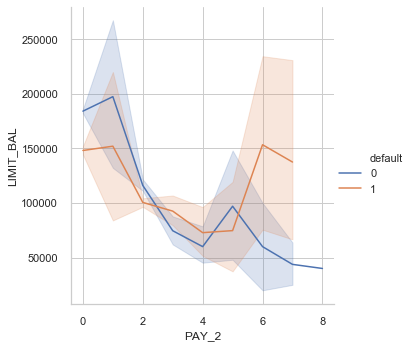

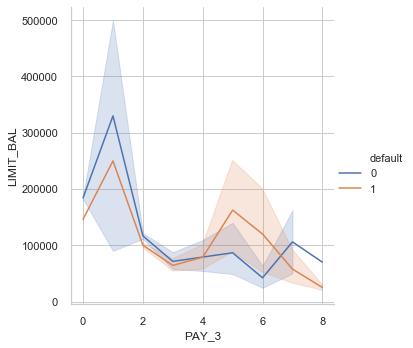

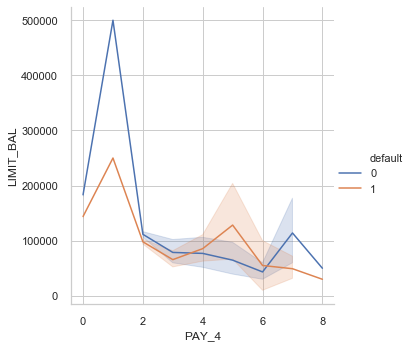

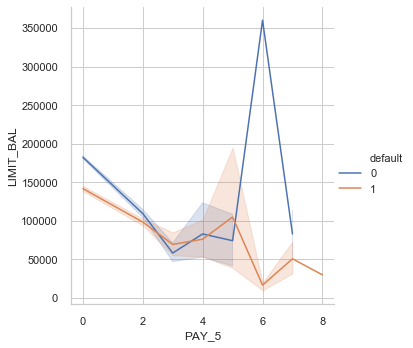

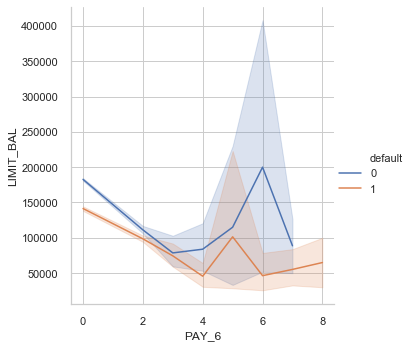

In [171]:
# Limit balance by Default and Repay Status
sns.set(style='whitegrid')
sns.relplot(x='PAY_1', y='LIMIT_BAL', hue='default', kind='line', data=credit)
sns.relplot(x='PAY_2', y='LIMIT_BAL', hue='default', kind='line', data=credit)
sns.relplot(x='PAY_3', y='LIMIT_BAL', hue='default', kind='line', data=credit)
sns.relplot(x='PAY_4', y='LIMIT_BAL', hue='default', kind='line', data=credit)
sns.relplot(x='PAY_5', y='LIMIT_BAL', hue='default', kind='line', data=credit)
sns.relplot(x='PAY_6', y='LIMIT_BAL', hue='default', kind='line', data=credit)

**Default clients**
No real relationships observed for Limit Balance by Repayment Status

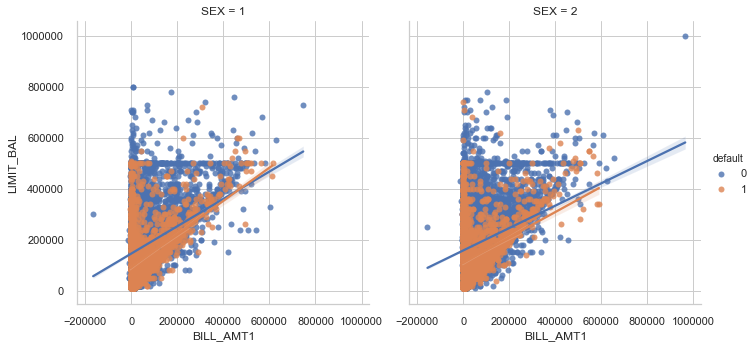

In [172]:
# Limit Balance by Bill Amount, Default, and Sex
sns.lmplot('BILL_AMT1', 'LIMIT_BAL', data=credit, hue='default', col='SEX')

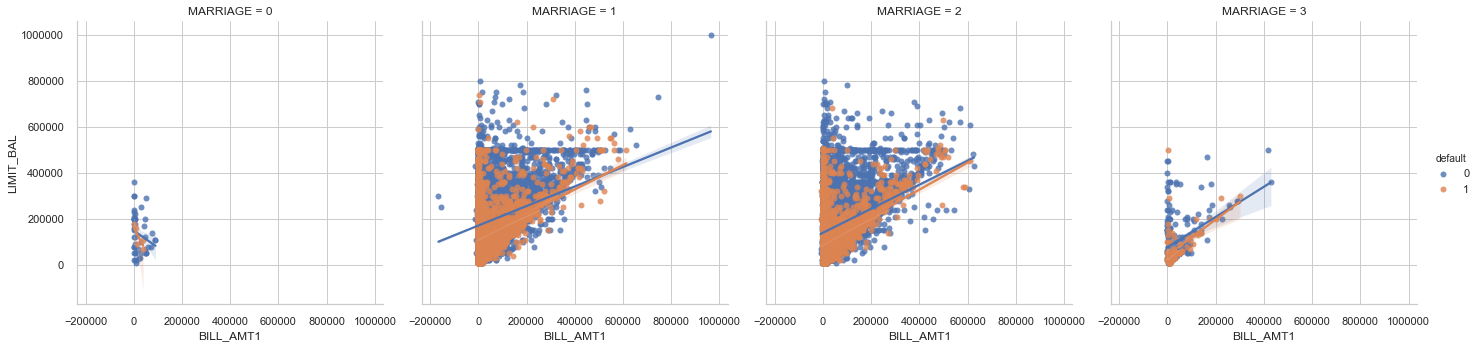

In [173]:
# Limit balance by Bill Amount, Default, and Marriage
sns.lmplot('BILL_AMT1', 'LIMIT_BAL', data=credit, hue='default', col='MARRIAGE')

No real relationships seen.

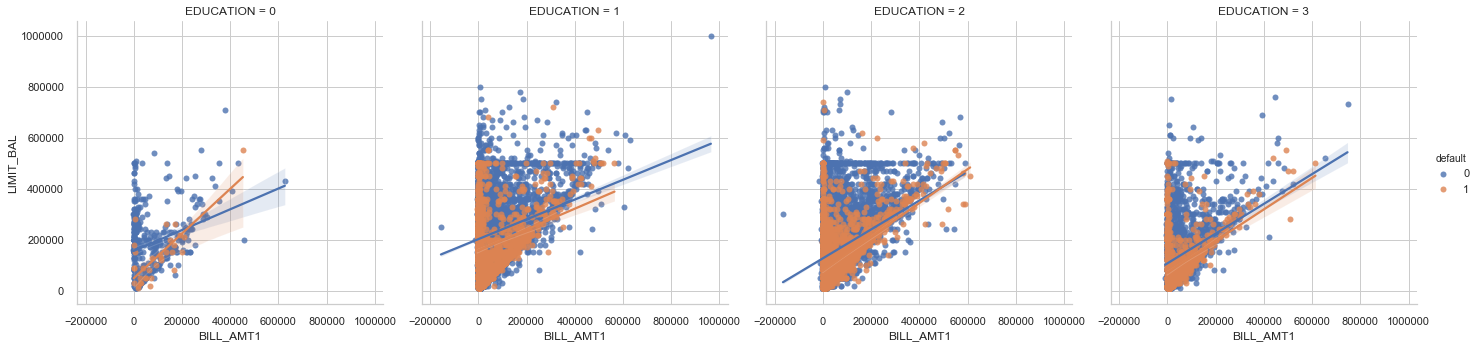

In [174]:
# Limit Balance by Bill Amount, Default, and Education 
sns.lmplot('BILL_AMT1', 'LIMIT_BAL', data=credit, hue='default', col='EDUCATION')

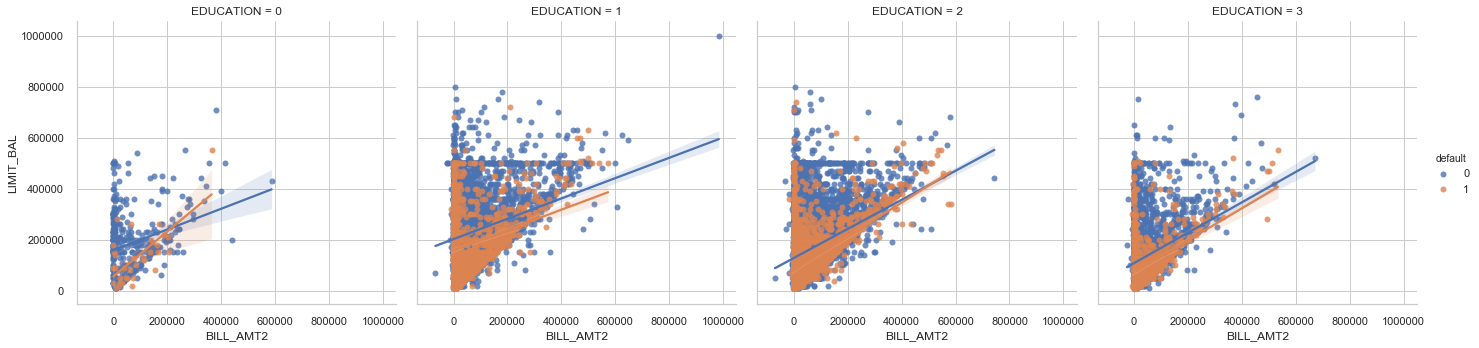

In [175]:
# Limit Balance by Bill Amount, Default, and Education 
sns.lmplot('BILL_AMT2', 'LIMIT_BAL', data=credit, hue='default', col='EDUCATION')

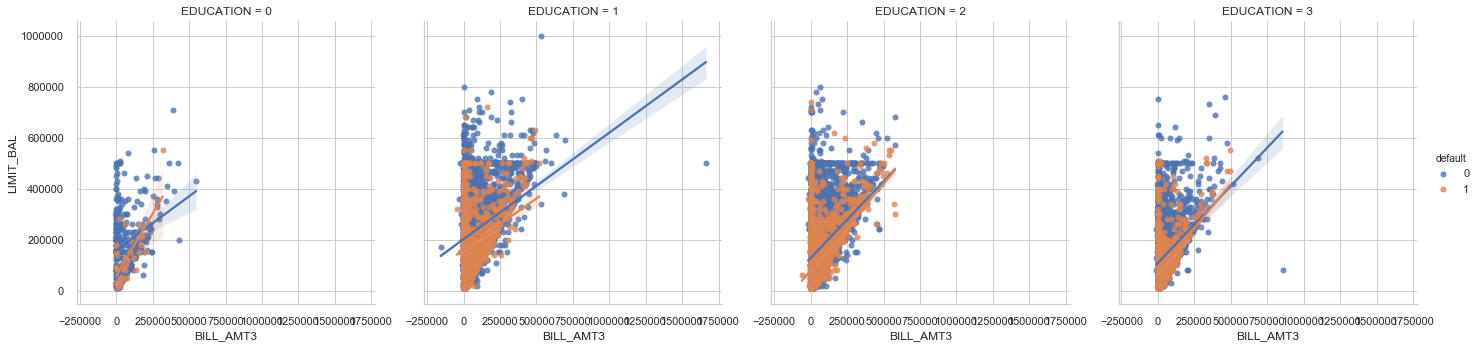

In [176]:
# Limit Balance by Bill Amount, Default, and Education 
sns.lmplot('BILL_AMT3', 'LIMIT_BAL', data=credit, hue='default', col='EDUCATION')

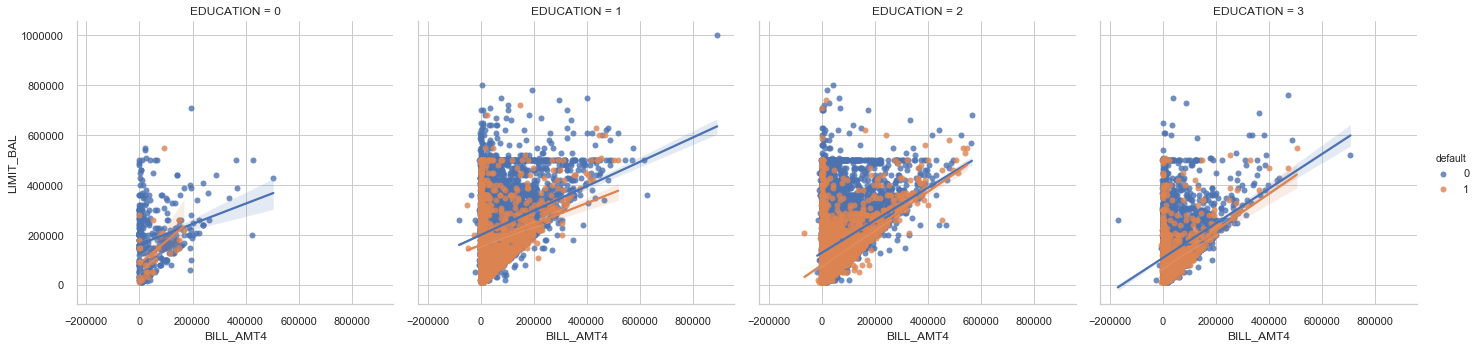

In [177]:
# Limit Balance by Bill Amount, Default, and Education 
sns.lmplot('BILL_AMT4', 'LIMIT_BAL', data=credit, hue='default', col='EDUCATION')

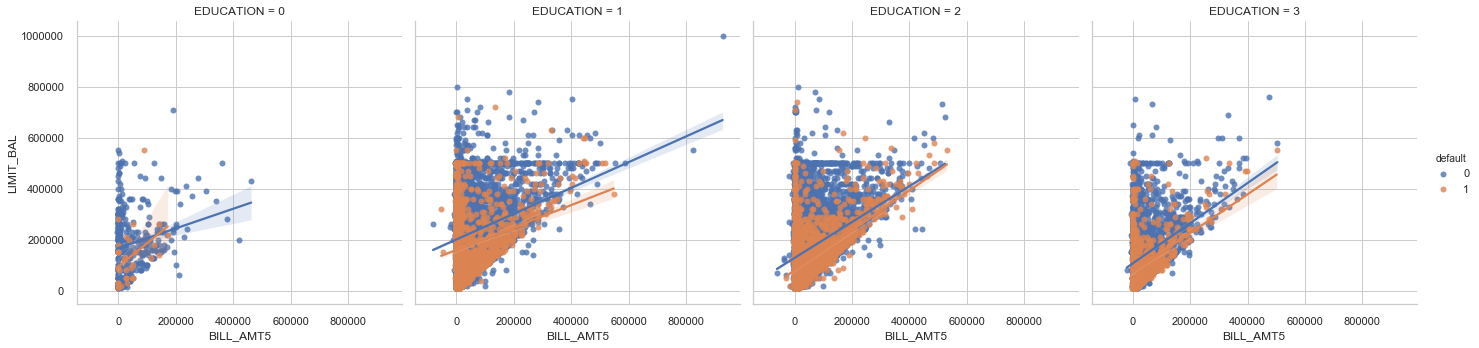

In [178]:
# Limit Balance by Bill Amount, Default, and Education 
sns.lmplot('BILL_AMT5', 'LIMIT_BAL', data=credit, hue='default', col='EDUCATION')

**Default clients:** Bill Amounts have positive linear relationship with limit balance. Other Educated may receive higher credit relative to bill amounts.

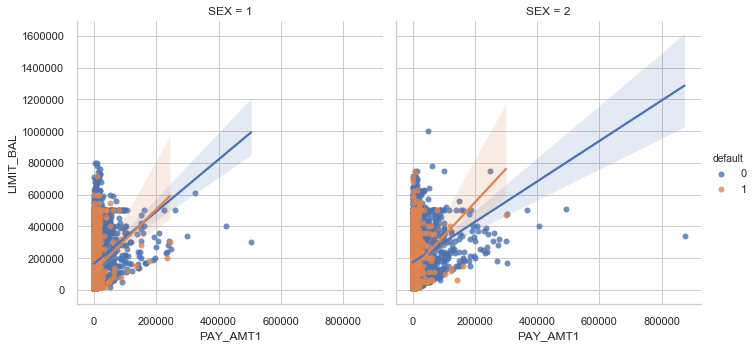

In [179]:
# Limit Balance by Payment Amount, Default, and Sex 
sns.lmplot('PAY_AMT1', 'LIMIT_BAL', data=credit, hue='default', col='SEX')

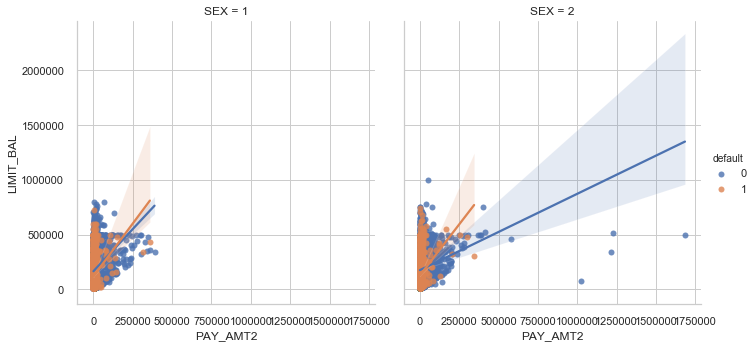

In [180]:
# Limit Balance by Payment Amount, Default, and Sex 
sns.lmplot('PAY_AMT2', 'LIMIT_BAL', data=credit, hue='default', col='SEX')

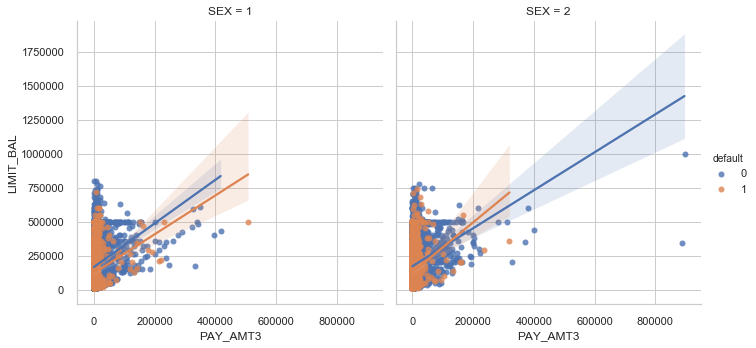

In [181]:
# Limit Balance by Payment Amount, Default, and Sex 
sns.lmplot('PAY_AMT3', 'LIMIT_BAL', data=credit, hue='default', col='SEX')

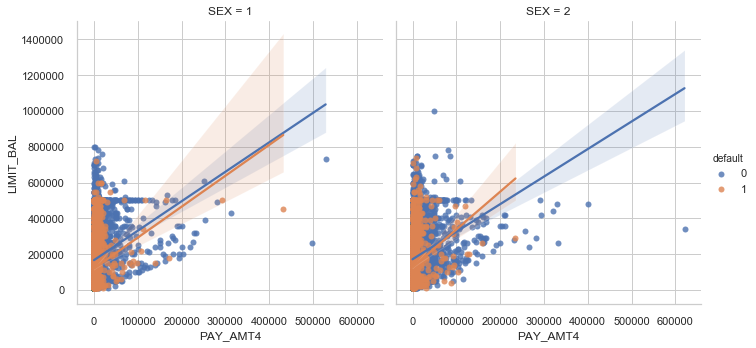

In [182]:
# Limit Balance by Payment Amount, Default, and Sex 
sns.lmplot('PAY_AMT4', 'LIMIT_BAL', data=credit, hue='default', col='SEX')

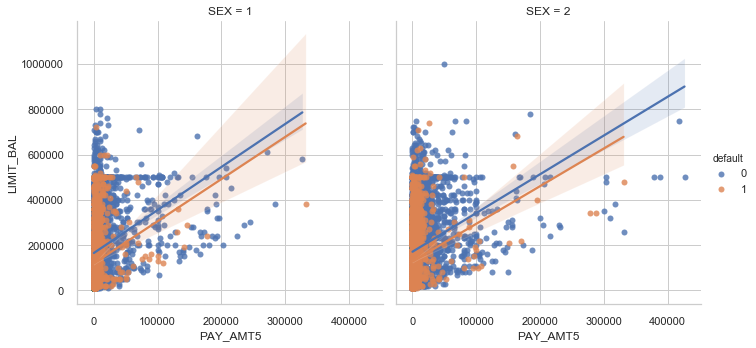

In [183]:
# Limit Balance by Payment Amount, Default, and Sex 
sns.lmplot('PAY_AMT5', 'LIMIT_BAL', data=credit, hue='default', col='SEX')

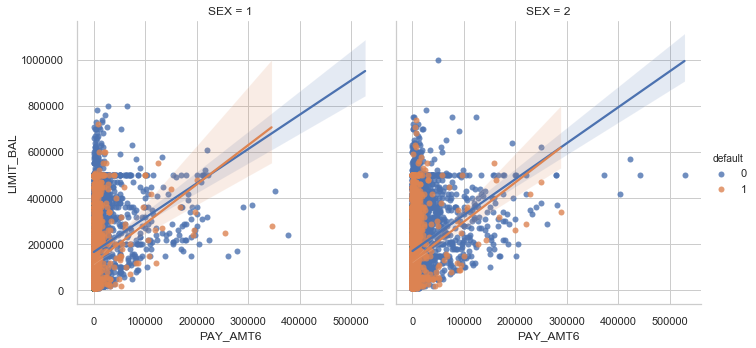

In [184]:
# Limit Balance by Payment Amount, Default, and Sex 
sns.lmplot('PAY_AMT6', 'LIMIT_BAL', data=credit, hue='default', col='SEX')

**Default clients:** Among women, those who defaulted received higher amount of credit relative to payments made in Sept, Aug, and June compared to women who did not default. The amount of credit relative to payments made for defaulters may not be different between men and women.

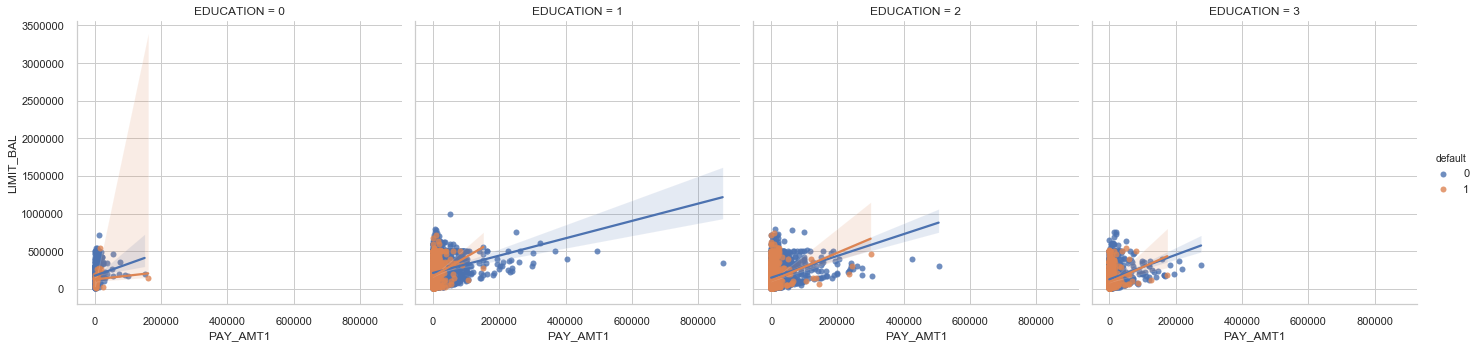

In [185]:
# Limit Balance by Payment Amount, Default, and Education
sns.lmplot('PAY_AMT1', 'LIMIT_BAL', data=credit, hue='default', col='EDUCATION')

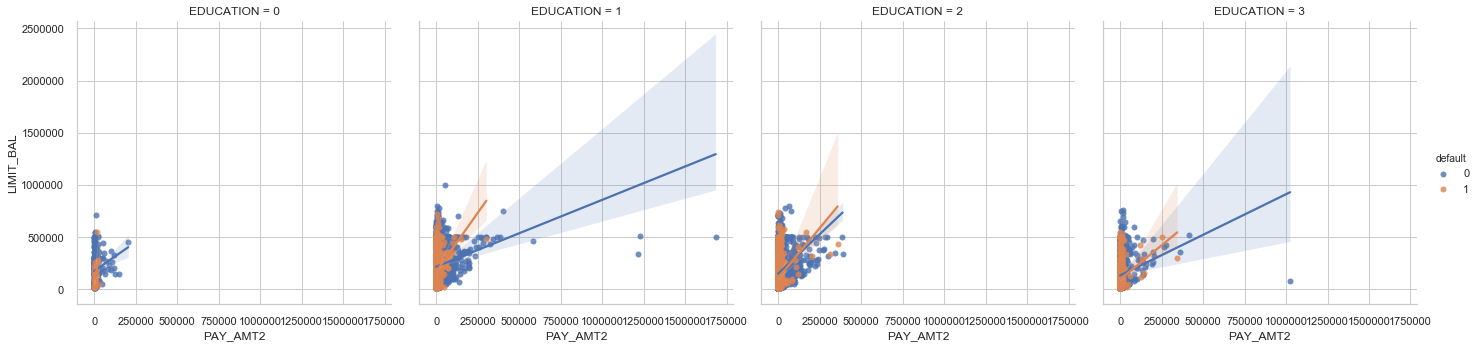

In [186]:
# Limit Balance by Payment Amount, Default, and Education
sns.lmplot('PAY_AMT2', 'LIMIT_BAL', data=credit, hue='default', col='EDUCATION')

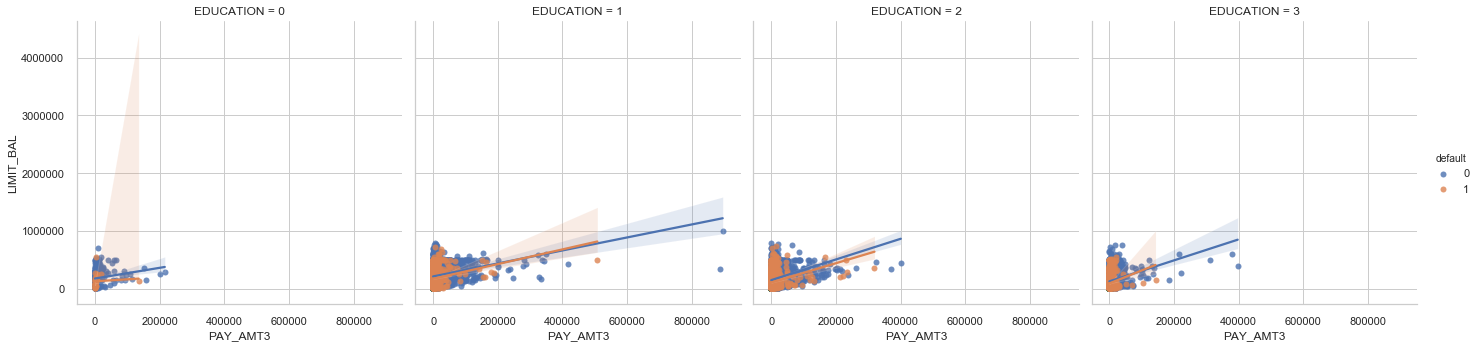

In [187]:
# Limit Balance by Payment Amount, Default, and Education
sns.lmplot('PAY_AMT3', 'LIMIT_BAL', data=credit, hue='default', col='EDUCATION')

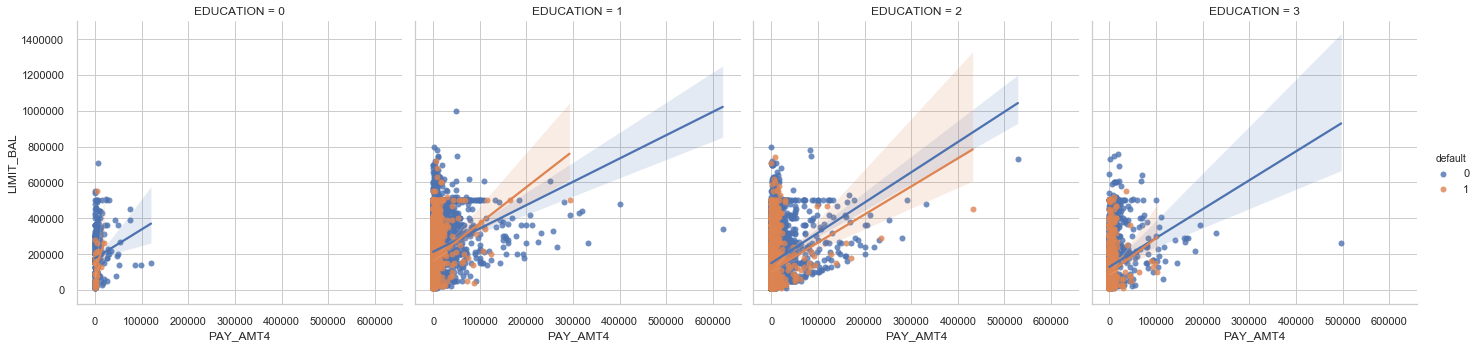

In [188]:
# Limit Balance by Payment Amount, Default, and Education
sns.lmplot('PAY_AMT4', 'LIMIT_BAL', data=credit, hue='default', col='EDUCATION')

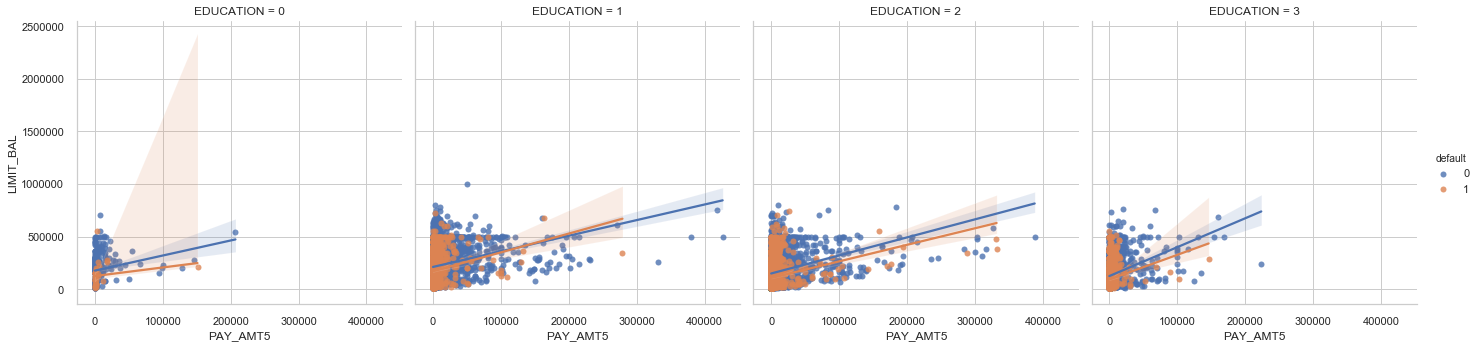

In [189]:
# Limit Balance by Payment Amount, Default, and Education
sns.lmplot('PAY_AMT5', 'LIMIT_BAL', data=credit, hue='default', col='EDUCATION')

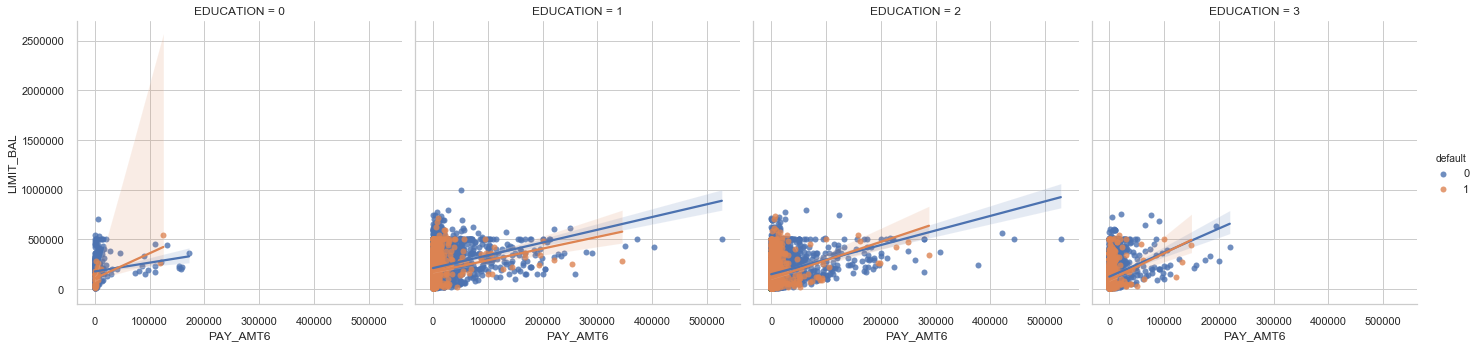

In [190]:
# Limit Balance by Payment Amount, Default, and Education
sns.lmplot('PAY_AMT6', 'LIMIT_BAL', data=credit, hue='default', col='EDUCATION')

**Default clients:** Grad School educated received higher credit limits relative to their payments made than their non-default counterparts and other Education levels in September, August, and June.

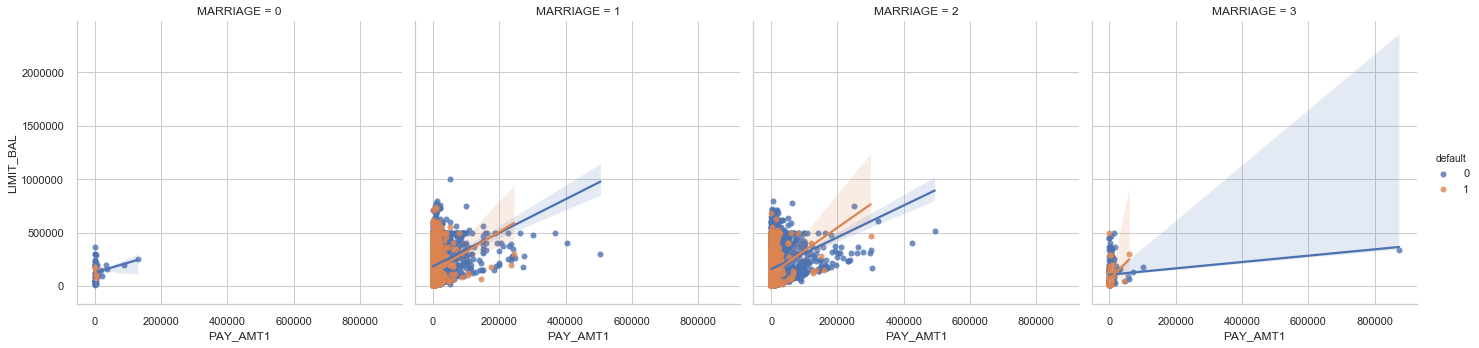

In [191]:
# Limit Balance by Payment Amount, Default, and Marriage
sns.lmplot('PAY_AMT1', 'LIMIT_BAL', data=credit, hue='default', col='MARRIAGE')

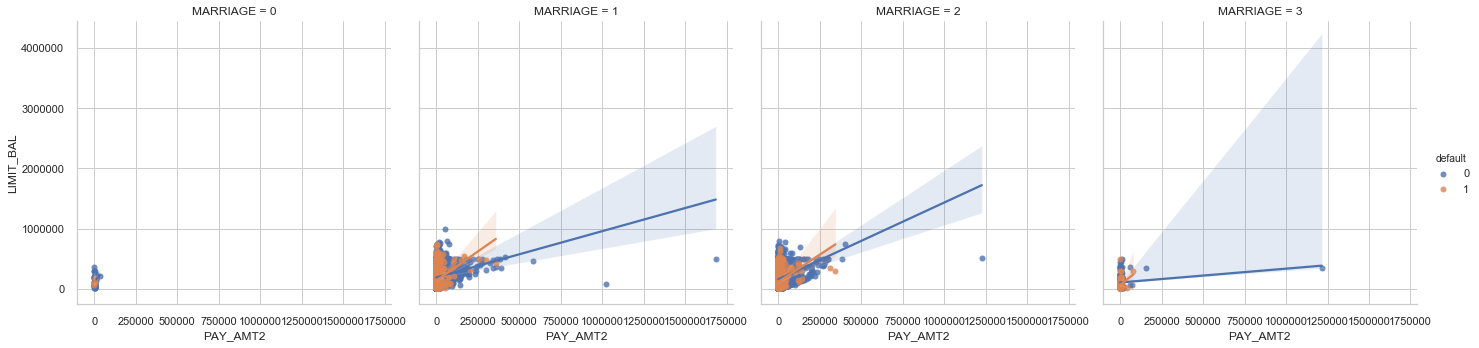

In [192]:
# Limit Balance by Payment Amount, Default, and Marriage
sns.lmplot('PAY_AMT2', 'LIMIT_BAL', data=credit, hue='default', col='MARRIAGE')

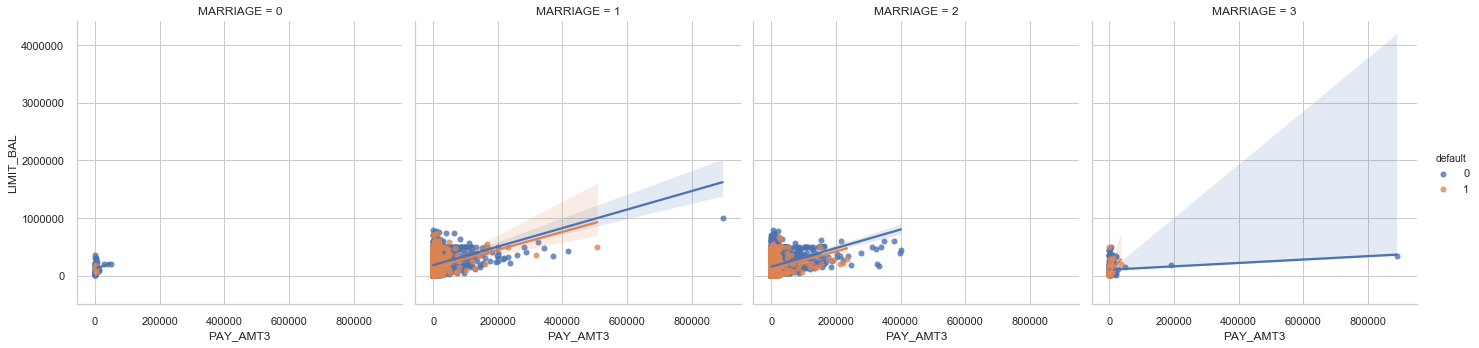

In [193]:
# Limit Balance by Payment Amount, Default, and Marriage
sns.lmplot('PAY_AMT3', 'LIMIT_BAL', data=credit, hue='default', col='MARRIAGE')

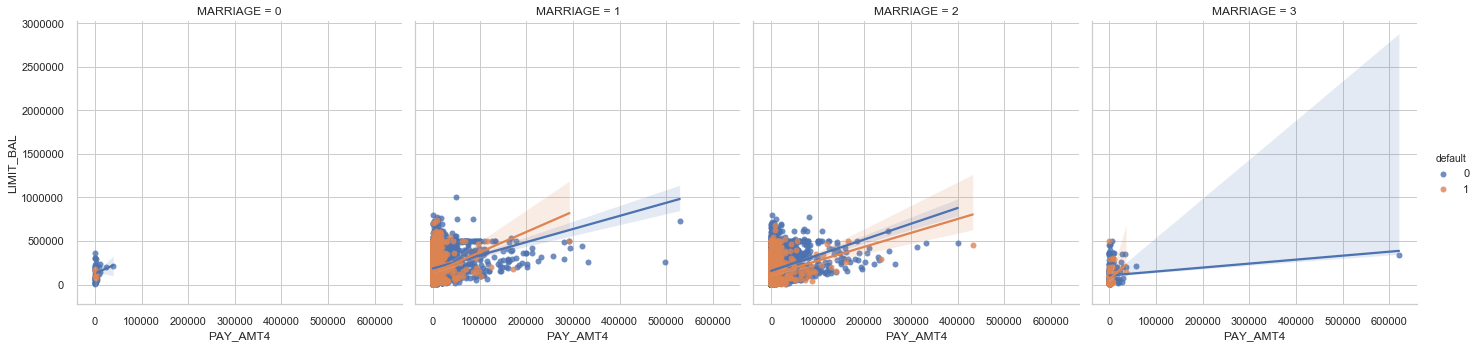

In [194]:
# Limit Balance by Payment Amount, Default, and Marriage
sns.lmplot('PAY_AMT4', 'LIMIT_BAL', data=credit, hue='default', col='MARRIAGE')

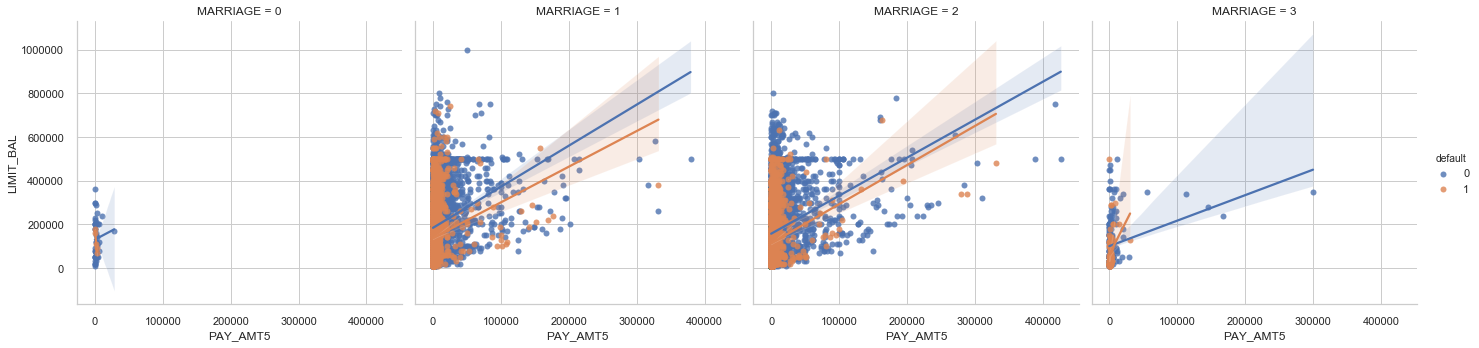

In [195]:
# Limit Balance by Payment Amount, Default, and Marriage
sns.lmplot('PAY_AMT5', 'LIMIT_BAL', data=credit, hue='default', col='MARRIAGE')

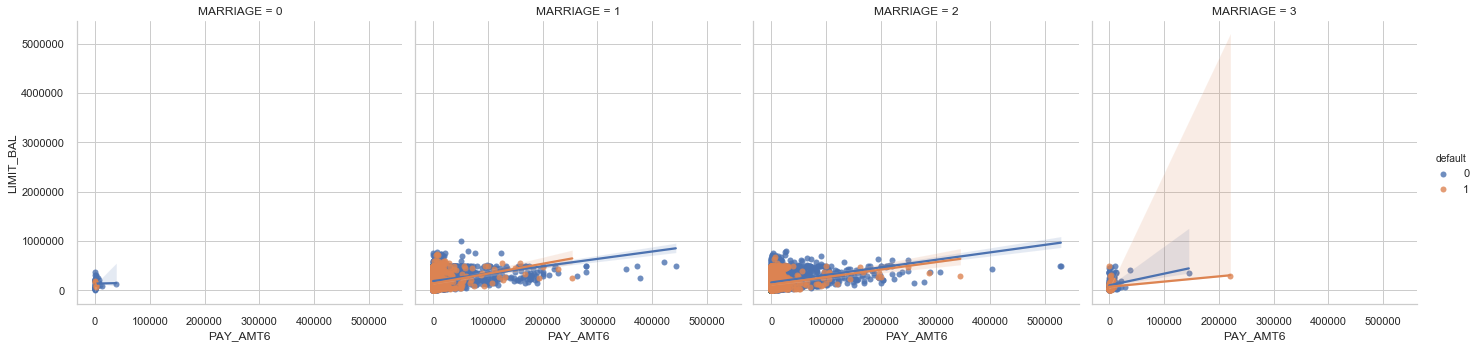

In [196]:
# Limit Balance by Payment Amount, Default, and Marriage
sns.lmplot('PAY_AMT6', 'LIMIT_BAL', data=credit, hue='default', col='MARRIAGE')

**Default:** No real relationships are seen here. Some months, married clients may have higher credit relative to payments made. Some months, divorced may. 1 month Single does. It is too variable to make a conclusion.

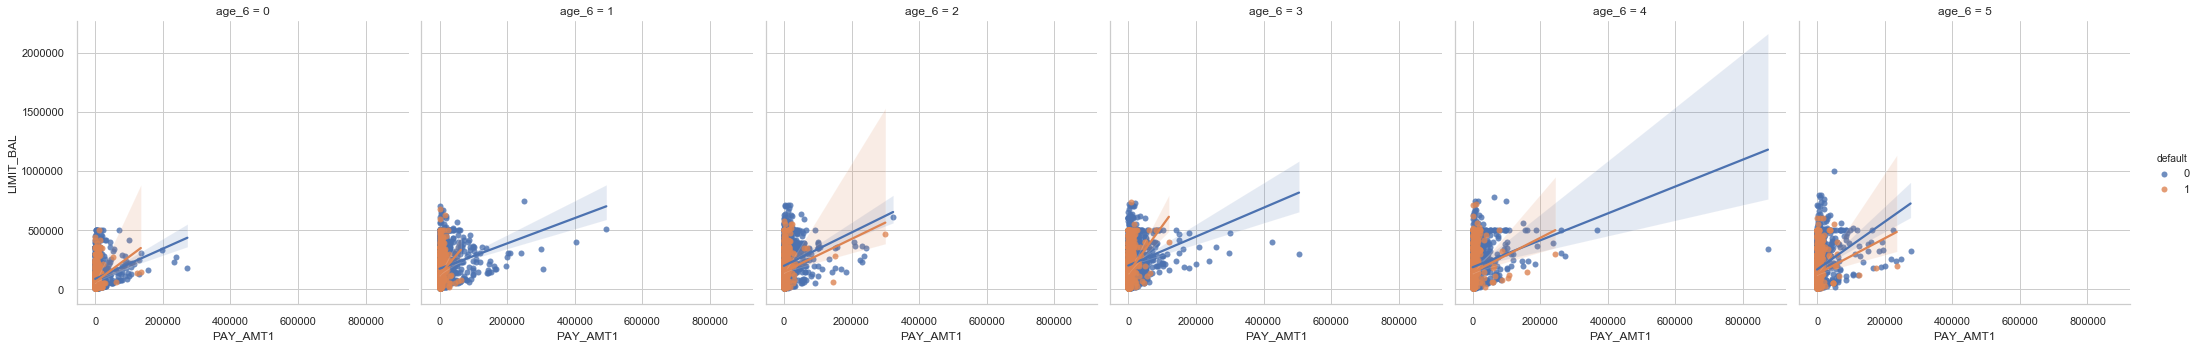

In [197]:
# Limit Balance by Sept Payment Amount, Default, and Age
sns.lmplot('PAY_AMT1', 'LIMIT_BAL', data=credit, hue='default', col='age_6')

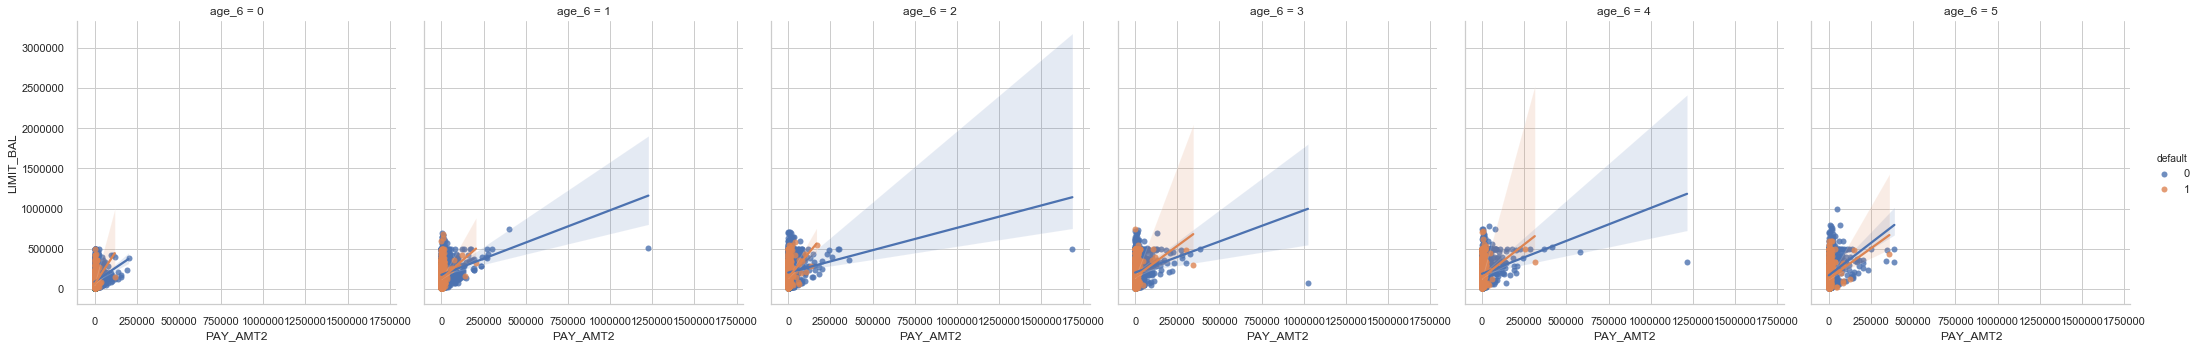

In [198]:
# Limit Balance by Aug Payment Amount, Default, and Age
sns.lmplot('PAY_AMT2', 'LIMIT_BAL', data=credit, hue='default', col='age_6')

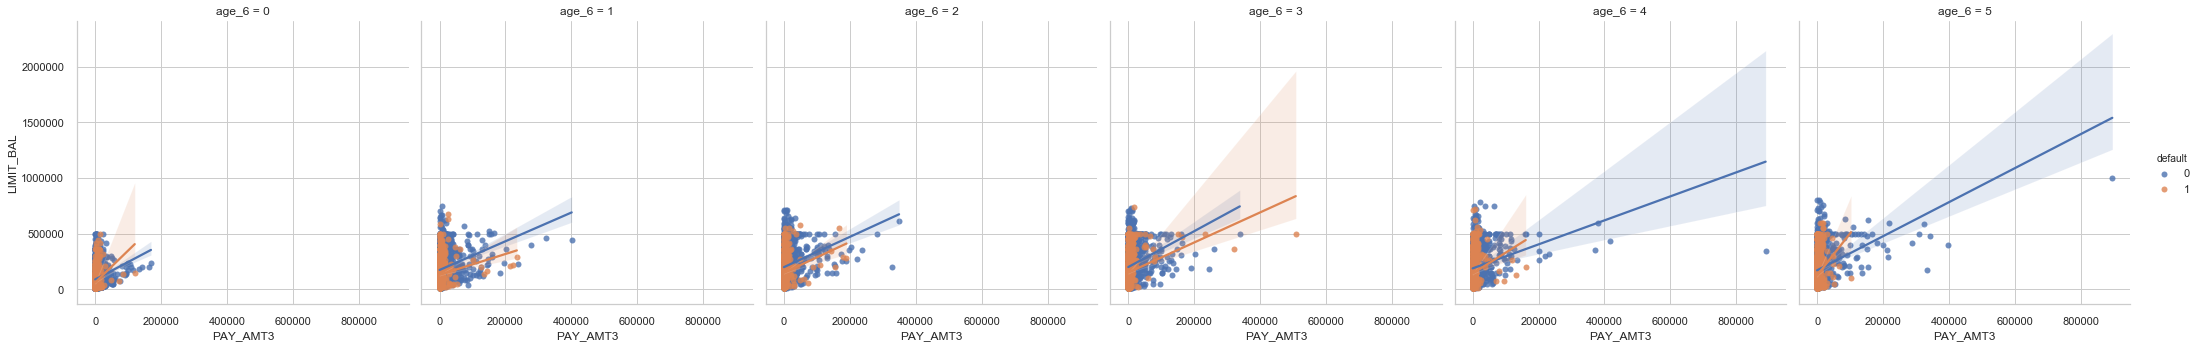

In [199]:
# Limit Balance by July Payment Amount, Default, and Age
sns.lmplot('PAY_AMT3', 'LIMIT_BAL', data=credit, hue='default', col='age_6')

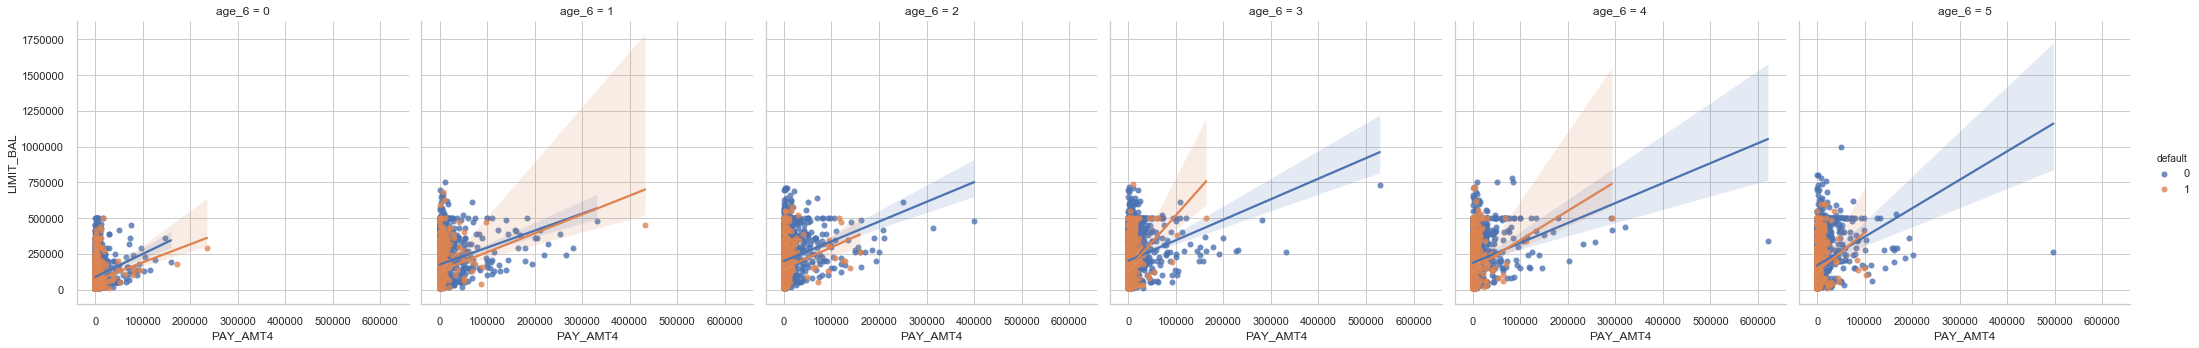

In [200]:
# Limit Balance by June Payment Amount, Default, and Age
sns.lmplot('PAY_AMT4', 'LIMIT_BAL', data=credit, hue='default', col='age_6')

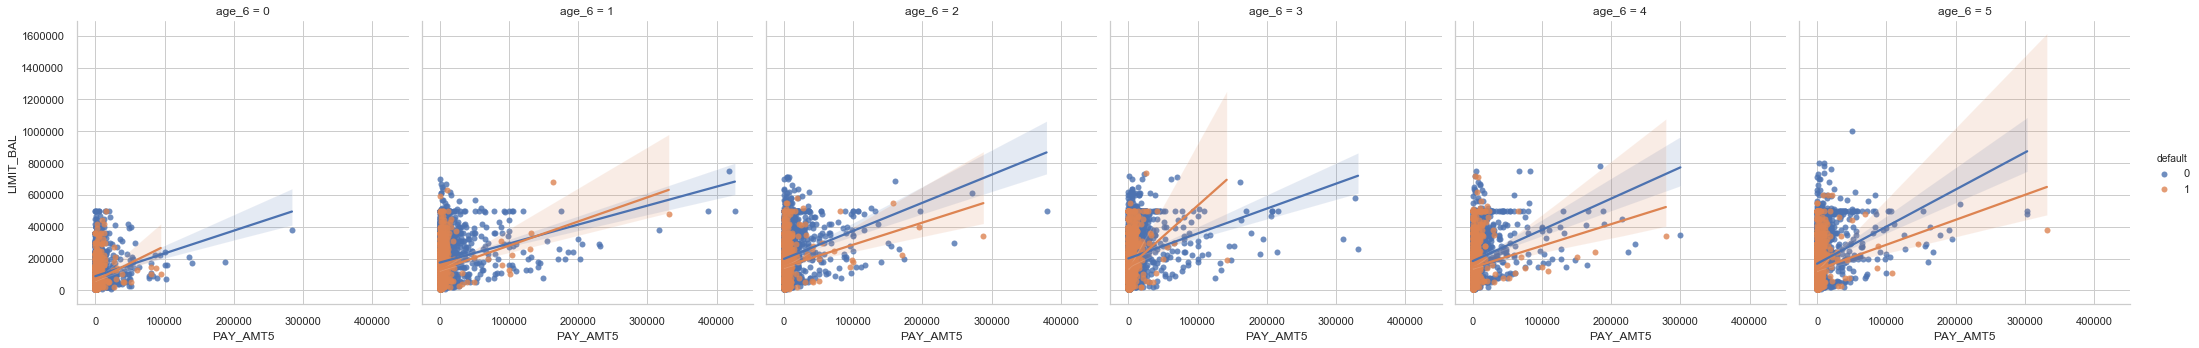

In [201]:
# Limit Balance by May Payment Amount, Default, and Age
sns.lmplot('PAY_AMT5', 'LIMIT_BAL', data=credit, hue='default', col='age_6')

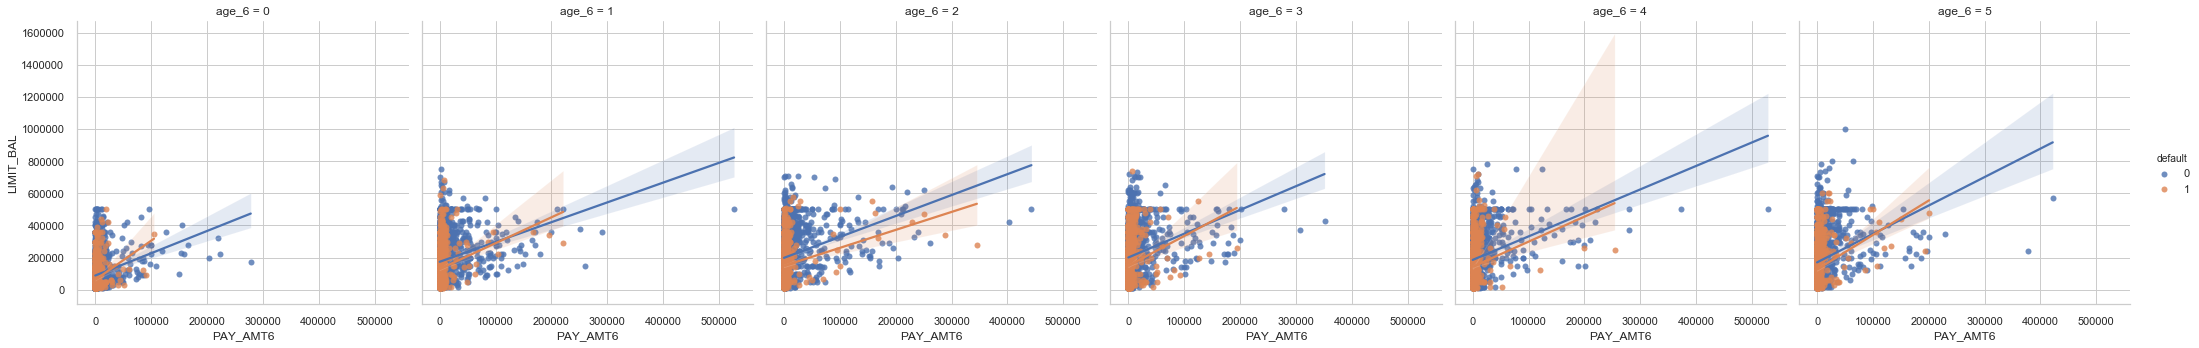

In [202]:
# Limit Balance by April Payment Amount, Default, and Age
sns.lmplot('PAY_AMT6', 'LIMIT_BAL', data=credit, hue='default', col='age_6')

**Default clients:** Age 40-44 yrs customers 3 of 6 months have higher credit relative to payments made.

### Summary of Multivariate Analysis of Limit Balance by Default

**Of Default Clients, those who received the highest credit (Limit Balances) are:**
1. Other Educated Men age 34-39 yrs by far received the most average credit of all (mean 335,000).
2. Grad School Educated, Married, and 30-39 yr olds.
3. Specific pockets include Married Men, Married Grad School (both genders), Women Grads 34-39, Men Grads 40-79, and Married 34-44 yr olds.
4. No real relationships seen with Repayment Status and Limit Balance.
5. Bill Amounts and Payment Amounts have a positive linear relationship with Limit Balance. 
6. Grad School Educated and 40-44 yrs olds received higher amounts of credit relative to the Payments they made.

### Checking for outliers

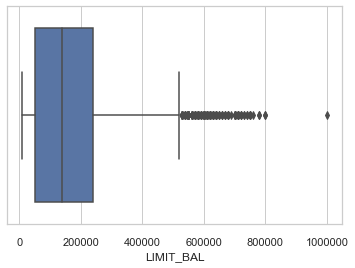

In [203]:
sns.boxplot(x=credit['LIMIT_BAL'])

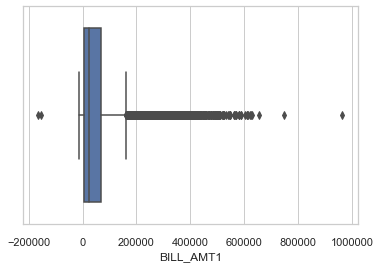

In [204]:
sns.boxplot(x=credit['BILL_AMT1'])

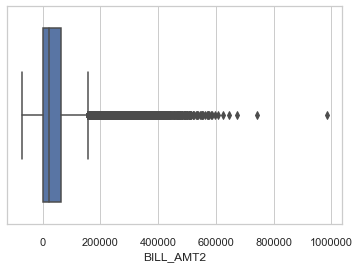

In [205]:
sns.boxplot(x=credit['BILL_AMT2'])

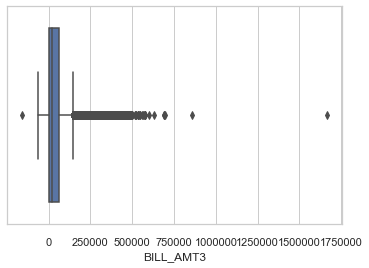

In [206]:
sns.boxplot(x=credit['BILL_AMT3'])

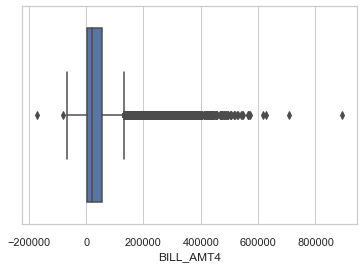

In [207]:
sns.boxplot(x=credit['BILL_AMT4'])

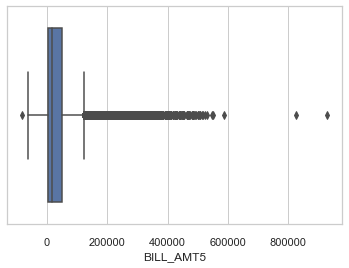

In [208]:
sns.boxplot(x=credit['BILL_AMT5'])

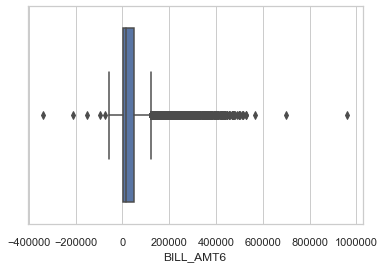

In [209]:
sns.boxplot(x=credit['BILL_AMT6'])

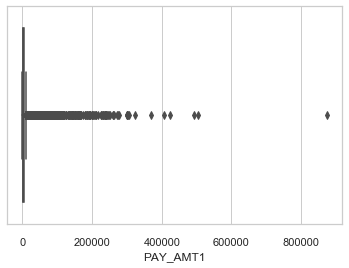

In [210]:
sns.boxplot(x=credit['PAY_AMT1'])

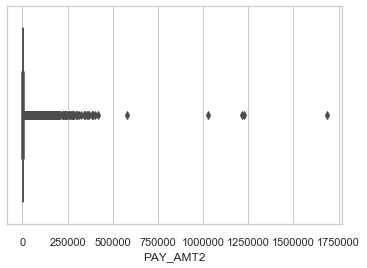

In [211]:
sns.boxplot(x=credit['PAY_AMT2'])

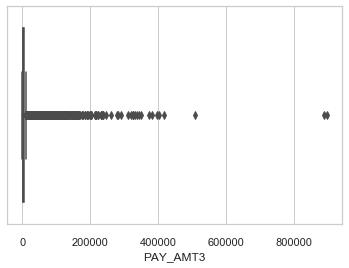

In [212]:
sns.boxplot(x=credit['PAY_AMT3'])

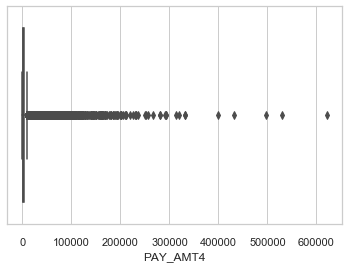

In [213]:
sns.boxplot(x=credit['PAY_AMT4'])

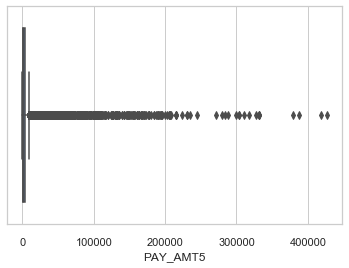

In [214]:
sns.boxplot(x=credit['PAY_AMT5'])

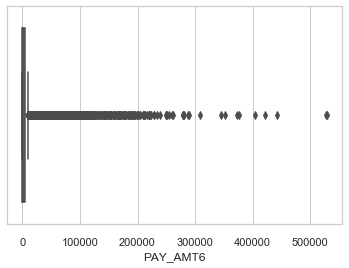

In [215]:
sns.boxplot(x=credit['PAY_AMT6'])

**Outliers were checked for continuous variables:** Because they were consistent amongst similar variables, and would resemble reality, e.g. the rare payment of 500,000 does happen, we will not remove outliers from financial features. If outliers were deemed completely off or not consistent between similar variables, we would handle with log or square root.

### Feature Transformation

Because regression algorithms can easily misinterpret categorical variables in which there are more than 2 values, I will change Education and Marriage to strings to prep for One Hot Encoding, which will binarize for regression modeling.

In [216]:
credit['EDUCATION'].replace([1,2,3,0],['graduate school','university','high school','other'],inplace=True)

In [217]:
credit['MARRIAGE'].replace([0,1,2,3],['other','married','single','divorced'],inplace=True)

In [218]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29965 entries, 0 to 29999
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   LIMIT_BAL  29965 non-null  int64 
 1   SEX        29965 non-null  int64 
 2   EDUCATION  29965 non-null  object
 3   MARRIAGE   29965 non-null  object
 4   AGE        29965 non-null  int64 
 5   PAY_1      29965 non-null  int64 
 6   PAY_2      29965 non-null  int64 
 7   PAY_3      29965 non-null  int64 
 8   PAY_4      29965 non-null  int64 
 9   PAY_5      29965 non-null  int64 
 10  PAY_6      29965 non-null  int64 
 11  BILL_AMT1  29965 non-null  int64 
 12  BILL_AMT2  29965 non-null  int64 
 13  BILL_AMT3  29965 non-null  int64 
 14  BILL_AMT4  29965 non-null  int64 
 15  BILL_AMT5  29965 non-null  int64 
 16  BILL_AMT6  29965 non-null  int64 
 17  PAY_AMT1   29965 non-null  int64 
 18  PAY_AMT2   29965 non-null  int64 
 19  PAY_AMT3   29965 non-null  int64 
 20  PAY_AMT4   29965 non-null  i

In [219]:
# One hot encoding for regression modeling
credit = pd.get_dummies(credit)

In [220]:
# Checking OHE variables, originals were removed
credit.head()

LIMIT_BAL  SEX  AGE  PAY_1  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  BILL_AMT1  \
0      20000    2   24      2      2      0      0      0      0       3913   
1     120000    2   26      0      2      0      0      0      2       2682   
2      90000    2   34      0      0      0      0      0      0      29239   
3      50000    2   37      0      0      0      0      0      0      46990   
4      50000    1   57      0      0      0      0      0      0       8617   

   ...  age_4  age_6  EDUCATION_graduate school  EDUCATION_high school  \
0  ...      0      0                          0                      0   
1  ...      0      0                          0                      0   
2  ...      1      2                          0                      0   
3  ...      2      3                          0                      0   
4  ...      3      5                          0                      0   

   EDUCATION_other  EDUCATION_university  MARRIAGE_divorced  MARRIAGE_married  \
0                0                     1                  0                 1   
1                0                     1                  0                 0   
2                0                     1                  0                 0   
3                0                     1                  0                 1   
4                0                     1                  0                 1   

   MARRIAGE_other  MARRIAGE_single  
0               0                0  
1               0                1  
2               0                1  
3               0                0  
4               0                0  

[5 rows x 32 columns]

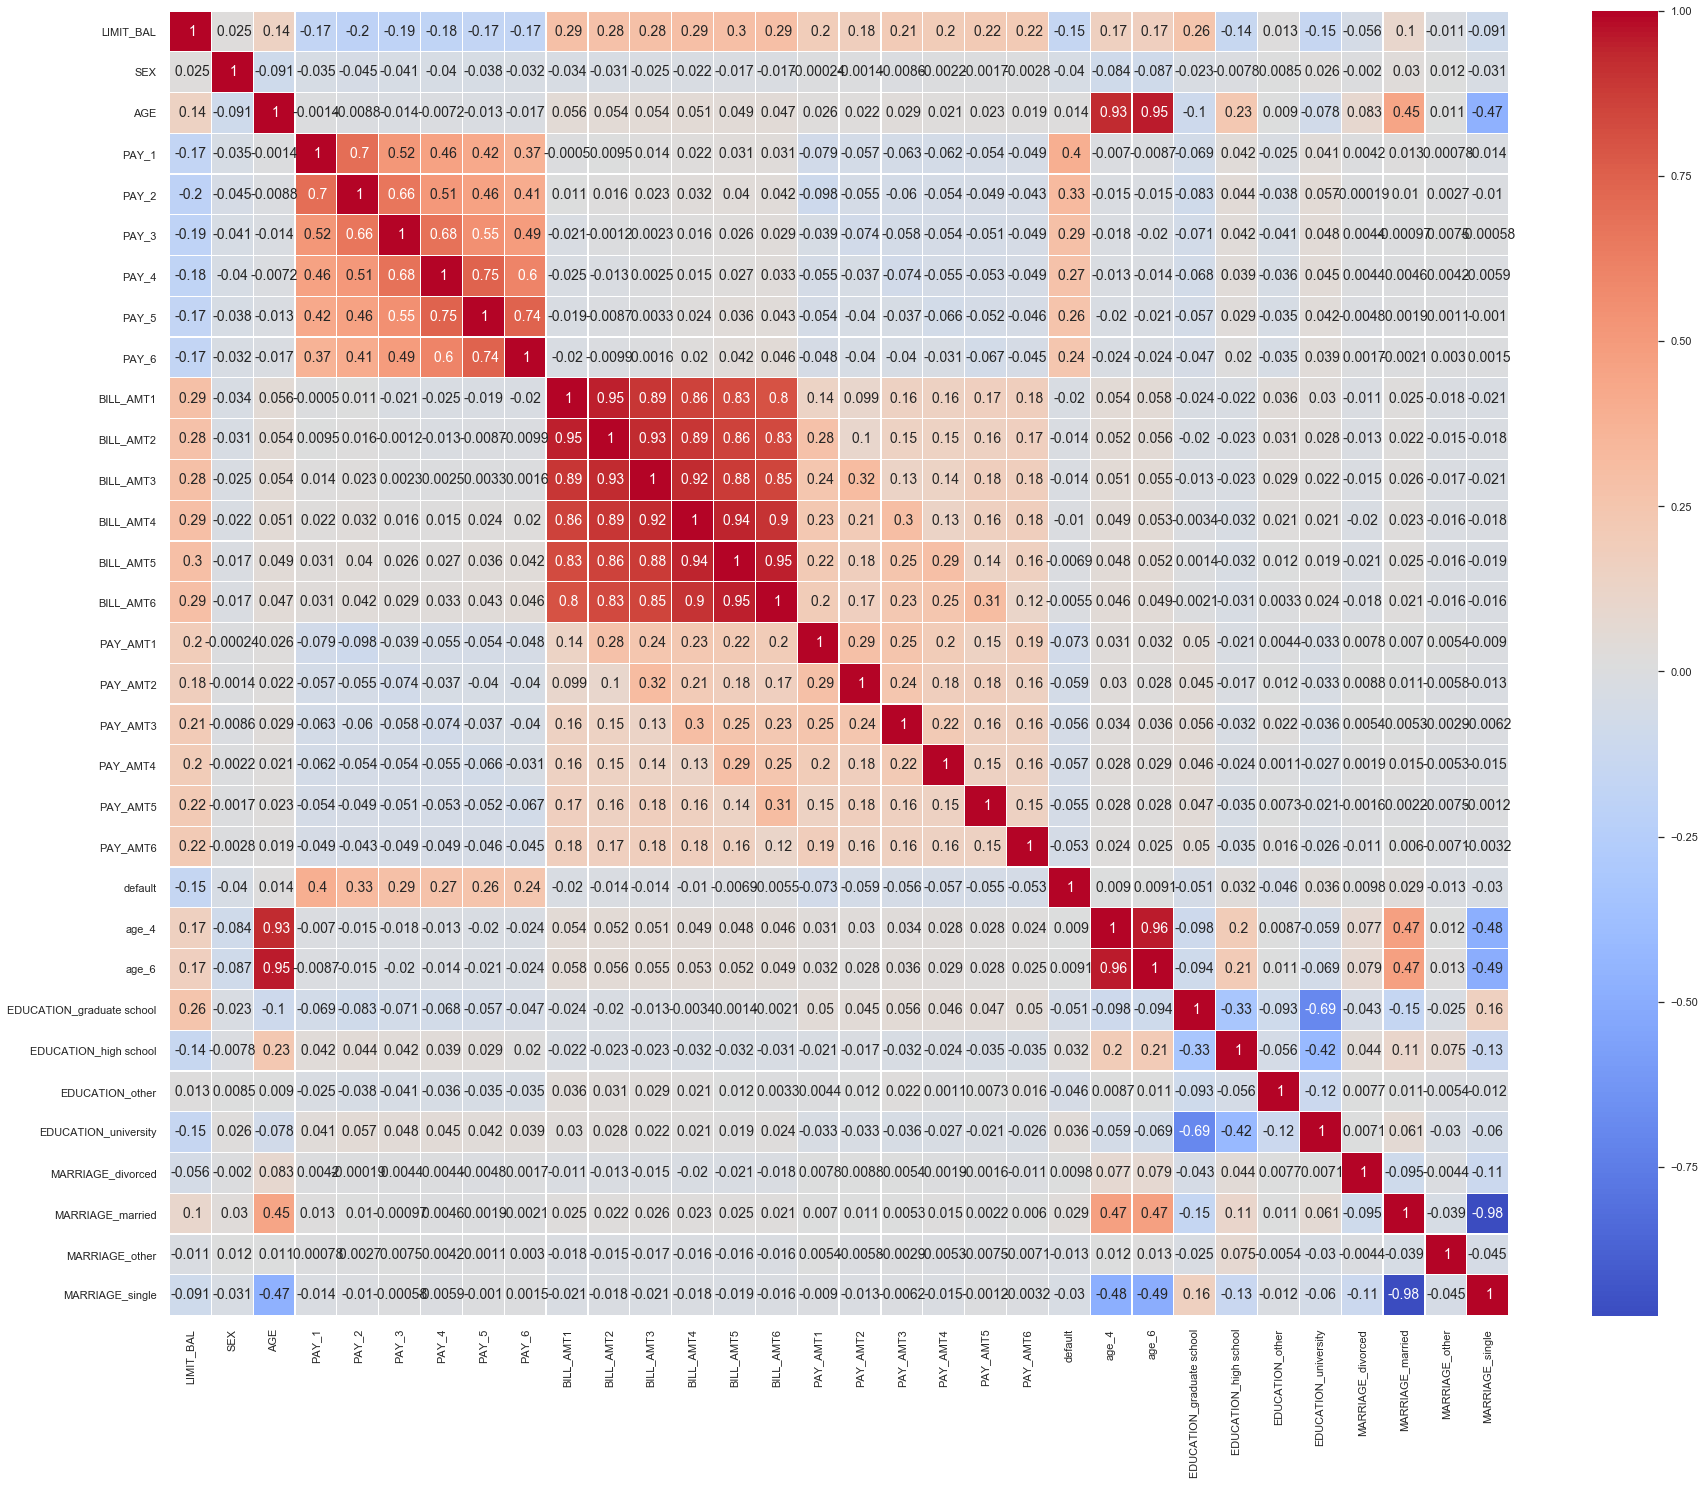

In [221]:
plt.subplots(figsize=(30,24))
sns.heatmap(credit.corr(), annot = True, annot_kws={'size': 14}, cmap='coolwarm', fmt=' .2g', linewidths = .3)

**Findings:** 
1. Pay1 - Pay6, Age, Sex, Marriage, and Education (except Graduate School) have low correlation to target variable, Limit Balance. Sex, Marriage, and Education (except Graduate School) have the lowest, therefore will be removed initially.
2. Note that Bill Amounts are highly collinear. I will not remove for now, but depending on model results, I may remove during model optimization phase.

### Modeling phase will continue in separate notebook

In [222]:
# Exporting to excel
credit.to_excel(r'C:\Users\jlbro\OneDrive\Course\credit.xlsx')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\jlbro\\OneDrive\\Course\\credit.xlsx'

In [ ]:
pip install openpyxl